In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv(r"C:\Users\tarus\infosys_springboard_internship\final_fashion_dataset (2).csv")
df.head()

user_id     id  gender masterCategory subCategory articleType baseColour  \
0    93810   8493   Women        Apparel  Bottomwear      Skirts      Black   
1    24592  30757     Men        Apparel     Topwear      Kurtas       Grey   
2    13278  14881   Women    Accessories        Bags    Handbags      Black   
3    46048  48449     Men        Apparel     Topwear     Tshirts       Blue   
4    42098   4697  Unisex    Accessories     Watches     Watches      Black   

   season    year   usage                                 productDisplayName  \
0    Fall  2011.0  Casual                     Forever New Women Black Skirts   
1  Summer  2012.0  Ethnic                 Fabindia Men Grey Mangalgiri Kurta   
2  Summer  2011.0  Casual  United Colors of Benetton Women Solid Black Ha...   
3  Summer  2012.0  Casual                 French Connection Men Blue T-shirt   
4  Winter  2016.0  Sports           ADIDAS Unisex Digital Duramo Black Watch   

    filename                                               link  ratings  \
0   8493.jpg  http://assets.myntassets.com/v1/images/style/p...        5   
1  30757.jpg  http://assets.myntassets.com/v1/images/style/p...        4   
2  14881.jpg  http://assets.myntassets.com/v1/images/style/p...        3   
3  48449.jpg  http://assets.myntassets.com/v1/images/style/p...        5   
4   4697.jpg  http://assets.myntassets.com/v1/images/style/p...        4   

                                              review      Month  Price (USD)  
0  Amazing quality! Definitely recommend. Would r...   November           46  
1              Perfect for any occasion, great buy..  September           29  
2                       It's okay, nothing special.!    October           39  
3  Comfortable and stylish, worth the price. and ...     August           39  
4              Perfect for any occasion, great buy.!      March           33

In [9]:
df.shape

(36484, 17)

<h3>handling missing values</h3>

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36484 entries, 0 to 36483
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             36484 non-null  int64  
 1   id                  36484 non-null  int64  
 2   gender              36484 non-null  object 
 3   masterCategory      36484 non-null  object 
 4   subCategory         36484 non-null  object 
 5   articleType         36484 non-null  object 
 6   baseColour          36484 non-null  object 
 7   season              36484 non-null  object 
 8   year                36484 non-null  float64
 9   usage               36484 non-null  object 
 10  productDisplayName  36484 non-null  object 
 11  filename            36484 non-null  object 
 12  link                36484 non-null  object 
 13  ratings             36484 non-null  int64  
 14  review              36484 non-null  object 
 15  Month               36484 non-null  object 
 16  Pric

In [11]:
df.isnull().sum()

user_id               0
id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
filename              0
link                  0
ratings               0
review                0
Month                 0
Price (USD)           0
dtype: int64

In [12]:
df.usage.value_counts()

usage
Casual          27597
Sports           3707
Ethnic           3040
Formal           2043
Smart Casual       64
Travel             26
Party               7
Name: count, dtype: int64

In [13]:
df.dropna(inplace=True)

In [14]:
df.describe()

user_id            id          year       ratings   Price (USD)
count  36484.000000  36484.000000  36484.000000  36484.000000  36484.000000
mean   55673.109336  27860.189124   2012.461737      3.600839     33.828610
std    25987.221109  16562.799723      1.860980      1.279767     11.320579
min    10022.000000   1163.000000   2007.000000      1.000000     10.000000
25%    32865.000000  13247.000000   2011.000000      3.000000     25.000000
50%    55706.000000  26471.500000   2012.000000      4.000000     34.000000
75%    78386.000000  41718.250000   2012.000000      5.000000     42.000000
max    99995.000000  60000.000000   2018.000000      5.000000     66.000000

In [15]:
catnames = [ 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season','usage','Month']
numnames = ['id','year','ratings','Price (USD)']

<h3>categorical data analysis</h3>

In [16]:
for i in catnames:
    print(f'{i}: {df[i].unique()}')

gender: ['Women' 'Men' 'Unisex' 'Boys' 'Girls']
masterCategory: ['Apparel' 'Accessories' 'Footwear']
subCategory: ['Bottomwear' 'Topwear' 'Bags' 'Watches' 'Shoes' 'Flip Flops' 'Jewellery'
 'Eyewear' 'Belts' 'Saree' 'Loungewear and Nightwear' 'Wallets' 'Socks']
articleType: ['Skirts' 'Kurtas' 'Handbags' 'Tshirts' 'Watches' 'Formal Shoes'
 'Flip Flops' 'Heels' 'Leggings' 'Backpacks' 'Earrings' 'Clutches'
 'Shirts' 'Casual Shoes' 'Dupatta' 'Jeans' 'Tops' 'Ring' 'Flats'
 'Suspenders' 'Sports Shoes' 'Sunglasses' 'Shorts' 'Belts' 'Sarees'
 'Nightdress' 'Jackets' 'Trousers' 'Messenger Bag' 'Track Pants' 'Kurtis'
 'Capris' 'Nehru Jackets' 'Sweatshirts' 'Wallets' 'Socks'
 'Necklace and Chains' 'Stockings' 'Waist Pouch' 'Patiala' 'Tunics'
 'Booties' 'Lounge Pants' 'Sweaters' 'Pendant' 'Duffel Bag' 'Tracksuits'
 'Baby Dolls' 'Bath Robe' 'Laptop Bag' 'Night suits' 'Tights' 'Jeggings'
 'Mobile Pouch' 'Jewellery Set' 'Lounge Shorts' 'Swimwear' 'Bangle'
 'Churidar' 'Salwar' 'Shrug' 'Bracelet' 'Waistc

<h3>outlier detection</h3>

In [17]:
dict_unique = {
    "numerical_columns": numnames,
    "unique_values": [df[i].nunique() for i in numnames]
}

In [18]:
df_unique = pd.DataFrame(dict_unique)
df_unique

numerical_columns  unique_values
0                id          36484
1              year             12
2           ratings              5
3       Price (USD)             57

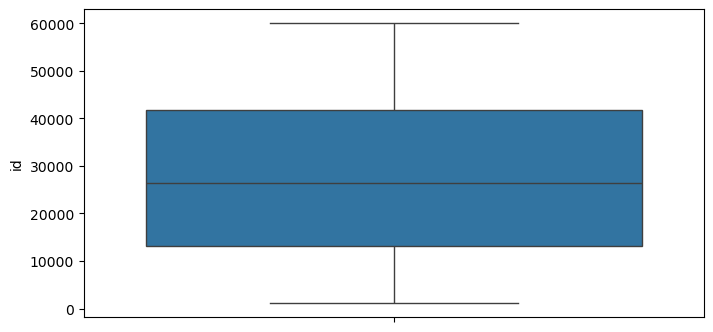

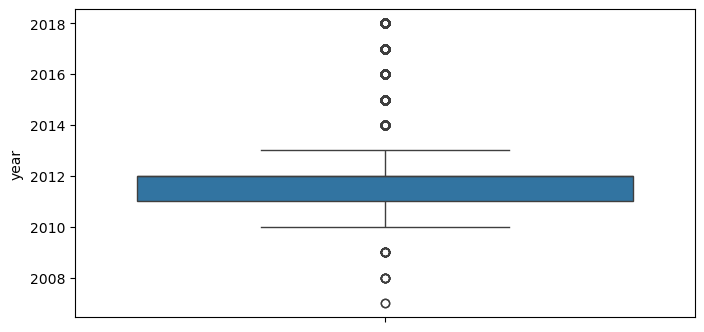

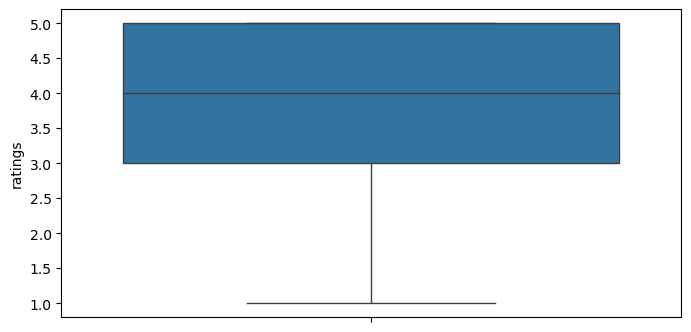

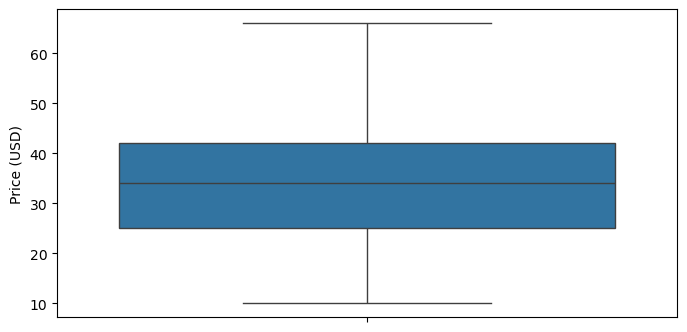

In [19]:
for i in numnames:
    plt.figure(figsize=(8,4))
    sns.boxplot(df[i])

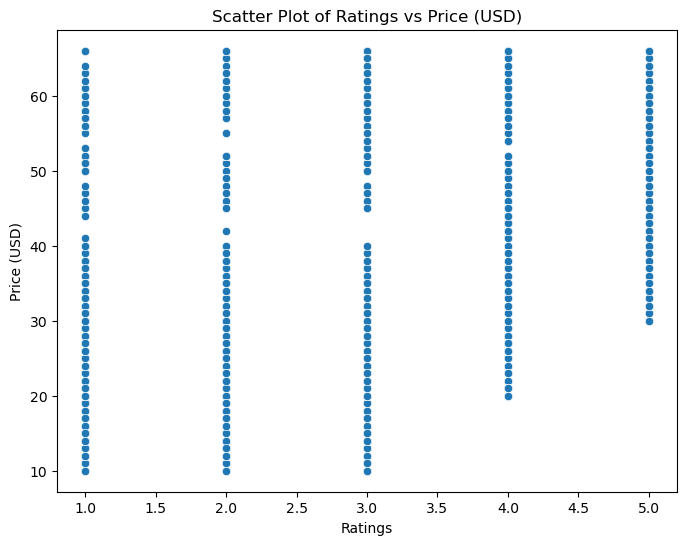

In [20]:
# Scatter plot for Ratings vs Price (USD)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='ratings', y='Price (USD)')
plt.title('Scatter Plot of Ratings vs Price (USD)')
plt.xlabel('Ratings')
plt.ylabel('Price (USD)')
plt.show()


In [21]:
q25,q75 = np.percentile(df["year"],[25,75])

In [22]:
iqr = q75 - q25
iqr

1.0

In [23]:
q0 = q25 - 1.5*iqr
q100 = q75 + 1.5*iqr
q0,q100

(2009.5, 2013.5)

In [24]:
df = df[(df['year'] >= q0) & (df['year'] <= q100)]

In [25]:
df

user_id     id  gender masterCategory subCategory   articleType  \
0        93810   8493   Women        Apparel  Bottomwear        Skirts   
1        24592  30757     Men        Apparel     Topwear        Kurtas   
2        13278  14881   Women    Accessories        Bags      Handbags   
3        46048  48449     Men        Apparel     Topwear       Tshirts   
6        28289  12868     Men       Footwear       Shoes  Formal Shoes   
...        ...    ...     ...            ...         ...           ...   
36475    73318  54078     Men       Footwear       Shoes  Sports Shoes   
36476    18851  13183     Men       Footwear       Shoes  Sports Shoes   
36477    55457  10264     Men       Footwear       Shoes  Formal Shoes   
36479    40311  45378   Women       Footwear       Shoes         Flats   
36483    85631   5864  Unisex       Footwear       Shoes  Casual Shoes   

      baseColour  season    year   usage  \
0          Black    Fall  2011.0  Casual   
1           Grey  Summer  2012.0  Ethnic   
2          Black  Summer  2011.0  Casual   
3           Blue  Summer  2012.0  Casual   
6          Black  Spring  2012.0  Formal   
...          ...     ...     ...     ...   
36475     Orange  Summer  2012.0  Sports   
36476      White    Fall  2011.0  Sports   
36477      Black  Summer  2013.0  Formal   
36479      Black  Summer  2012.0  Casual   
36483  Navy Blue  Winter  2011.0  Casual   

                                      productDisplayName   filename  \
0                         Forever New Women Black Skirts   8493.jpg   
1                     Fabindia Men Grey Mangalgiri Kurta  30757.jpg   
2      United Colors of Benetton Women Solid Black Ha...  14881.jpg   
3                     French Connection Men Blue T-shirt  48449.jpg   
6                      Lee Cooper Men Formal Black Shoes  12868.jpg   
...                                                  ...        ...   
36475    ADIDAS Men Orange F50 Adizero HG Football Shoes  54078.jpg   
36476                 Fila Men Dls 96 White Sports Shoes  13183.jpg   
36477    Clarks Men Goya Band Leather Black Formal Shoes  10264.jpg   
36479                          Rocia Women Black Sandals  45378.jpg   
36483  Converse Chuck Taylor All Star Unisex Navy Blu...   5864.jpg   

                                                    link  ratings  \
0      http://assets.myntassets.com/v1/images/style/p...        5   
1      http://assets.myntassets.com/v1/images/style/p...        4   
2      http://assets.myntassets.com/v1/images/style/p...        3   
3      http://assets.myntassets.com/v1/images/style/p...        5   
6      http://assets.myntassets.com/v1/images/style/p...        3   
...                                                  ...      ...   
36475  http://assets.myntassets.com/v1/images/style/p...        5   
36476  http://assets.myntassets.com/v1/images/style/p...        5   
36477  http://assets.myntassets.com/v1/images/style/p...        5   
36479  http://assets.myntassets.com/v1/images/style/p...        5   
36483  http://assets.myntassets.com/v1/images/style/p...        2   

                                                  review      Month  \
0      Amazing quality! Definitely recommend. Would r...   November   
1                  Perfect for any occasion, great buy..  September   
2                           It's okay, nothing special.!    October   
3      Comfortable and stylish, worth the price. and ...     August   
6      Satisfactory for the price. for special occasi...     August   
...                                                  ...        ...   
36475  Exceeded expectations, love the fit! but could...  September   
36476  Perfect for any occasion, great buy. and I'm v...    January   
36477              Exceeded expectations, love the fit!.   November   
36479  High quality fabric, very satisfied. and I'm v...   November   
36483            Not as described, low-quality product.!   February   

       Price (USD)  
0               46  
1           

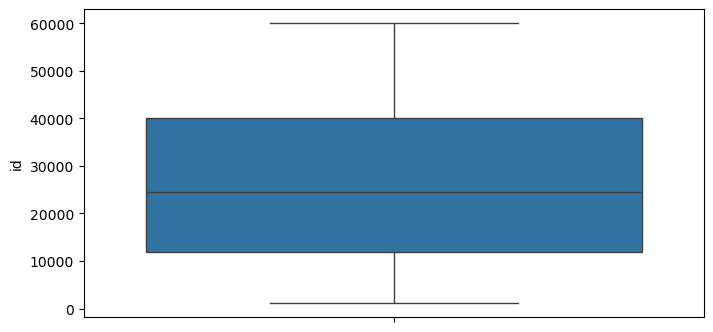

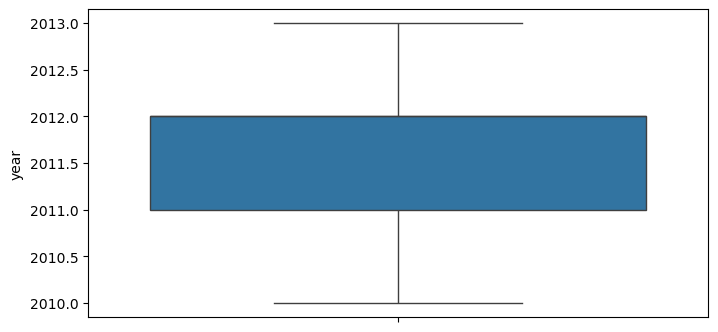

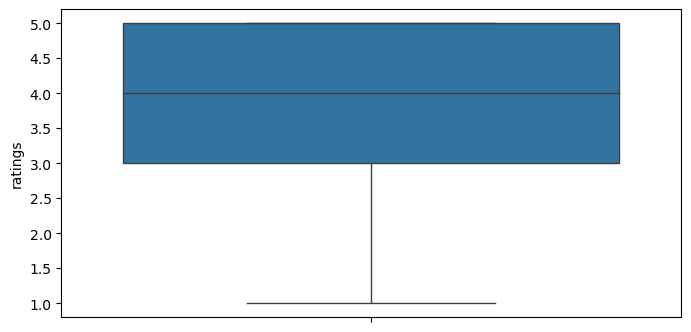

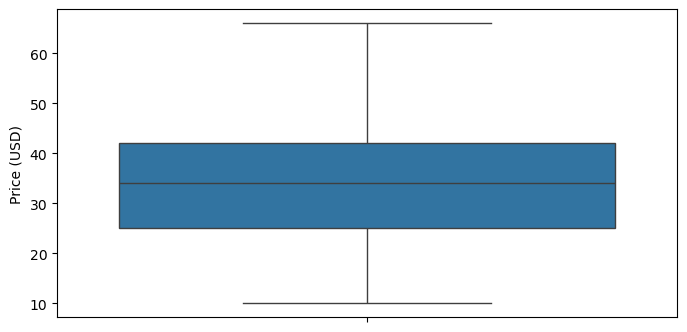

In [26]:
for i in numnames:
    plt.figure(figsize=(8,4))
    sns.boxplot(df[i])

<h3>distribution analysis</h3>

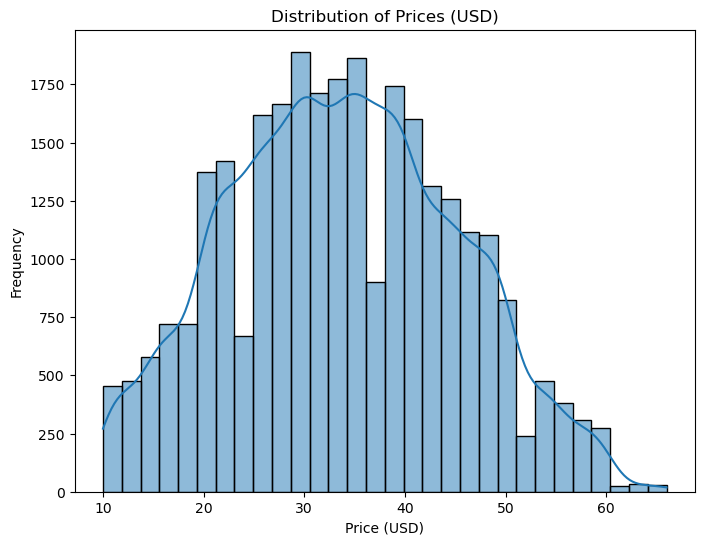

In [27]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Price (USD)'], bins=30, kde=True)
plt.title('Distribution of Prices (USD)')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

id:  0.2925079053459858
year:  -0.044228810268022695
ratings:  -0.6518348738113221
Price (USD):  0.10747816858420171


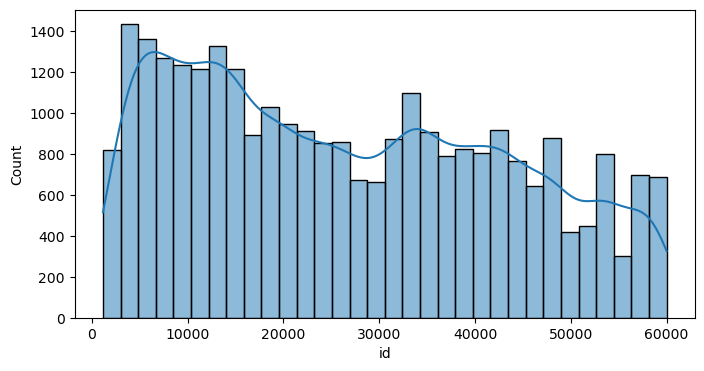

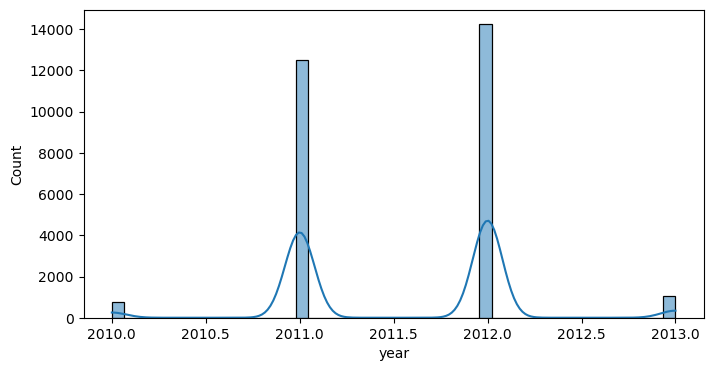

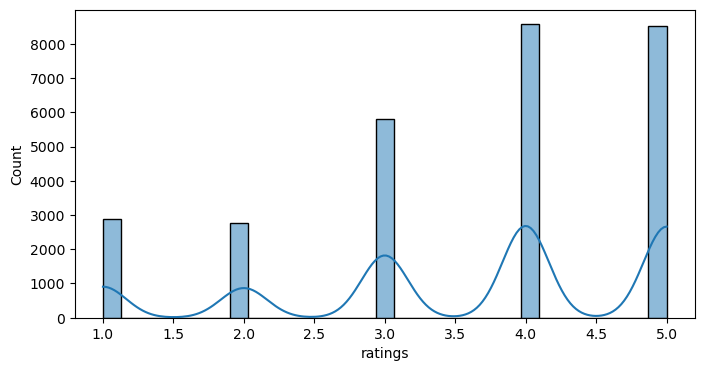

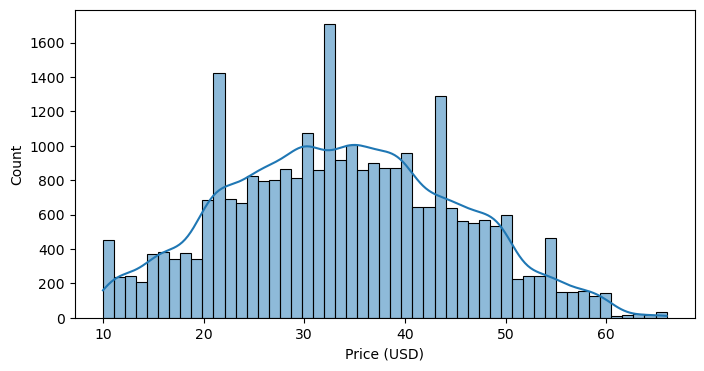

In [28]:
# plotting histograms to check the distribution of numerical data
from scipy.stats import skew
for i in numnames:
    plt.figure(figsize=(8,4))
    print(f"{i}: ",df[i].skew())
    sns.histplot(df[i],kde=True)

<h3>categorical analysis</h3>

Frequency Distribution of categorical columns


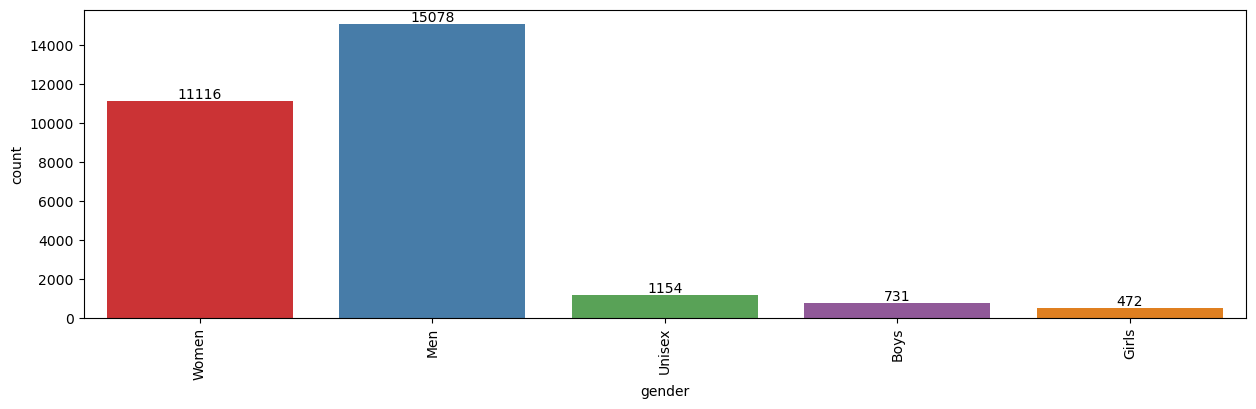

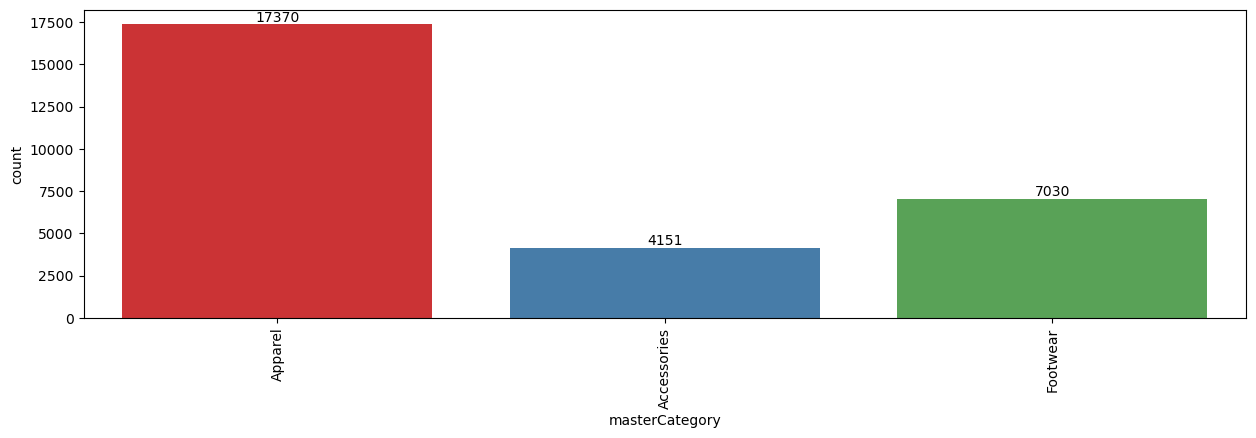

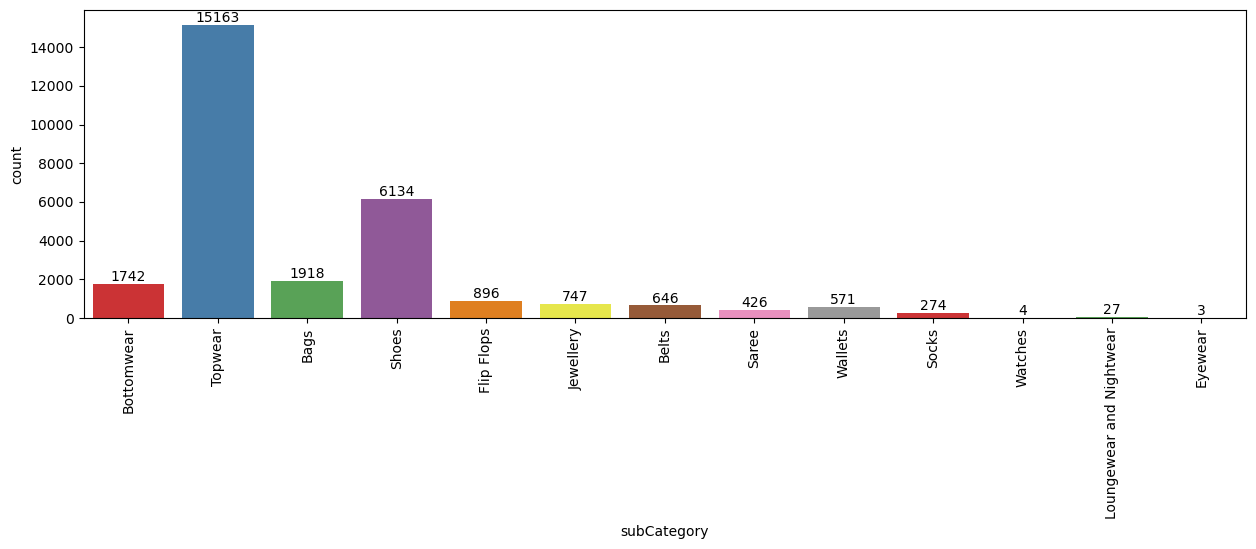

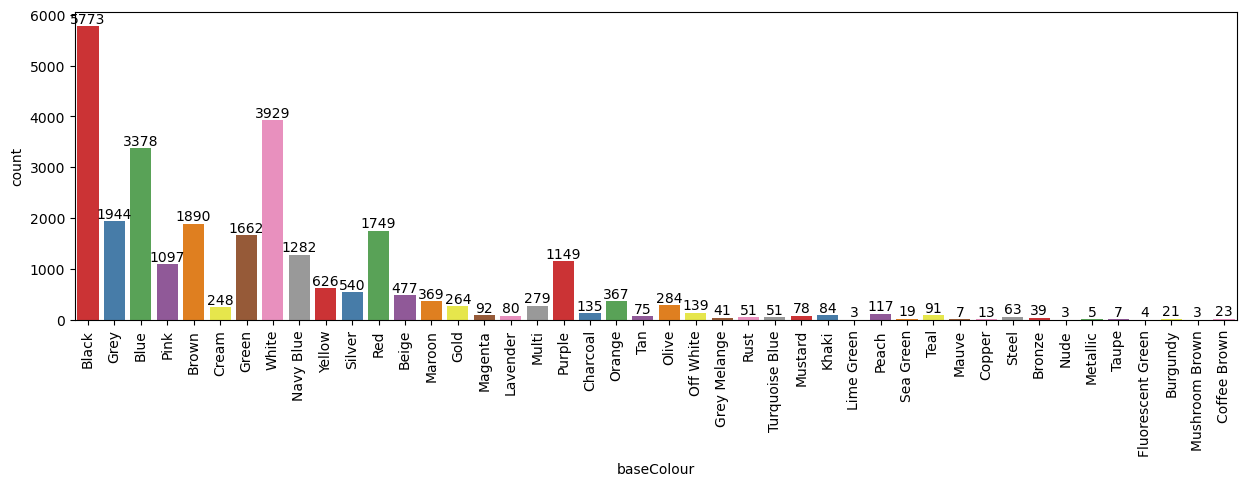

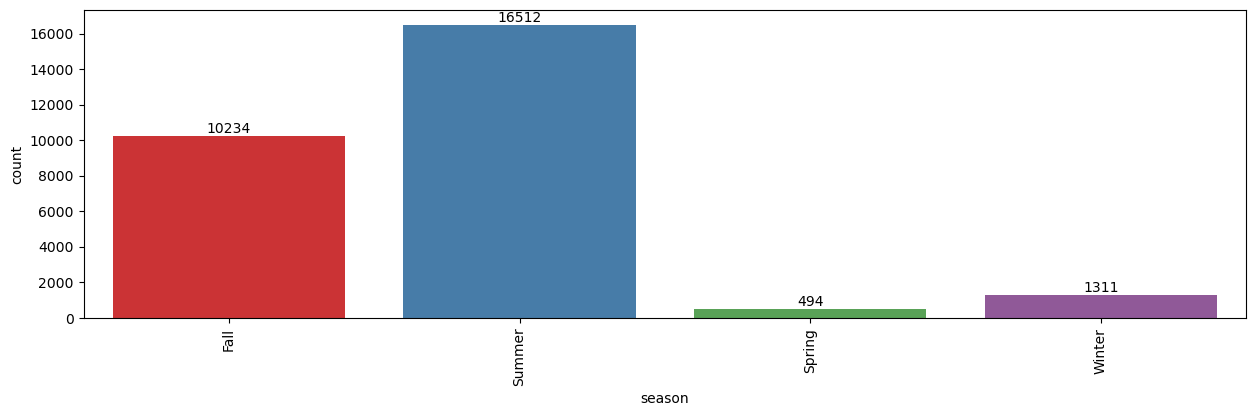

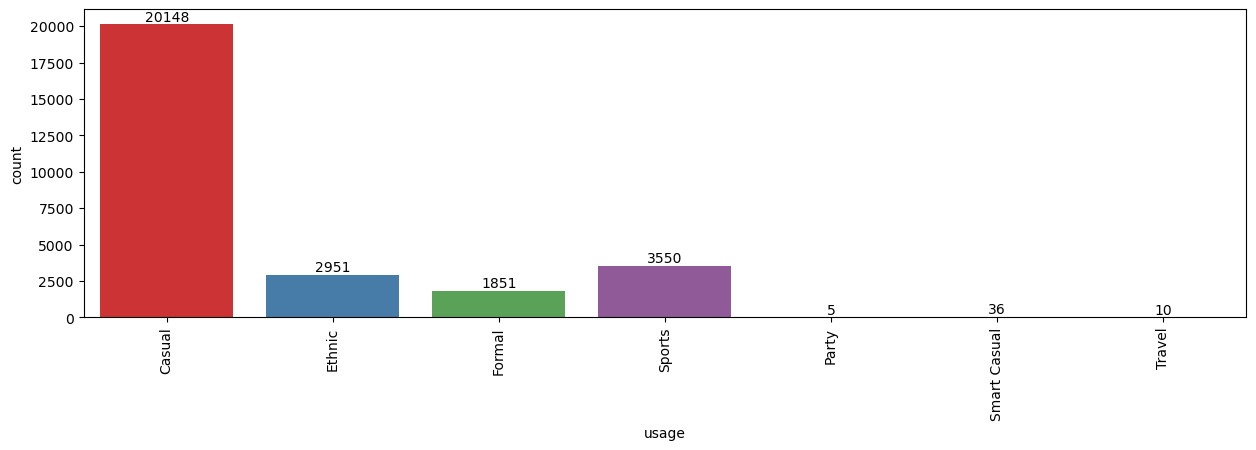

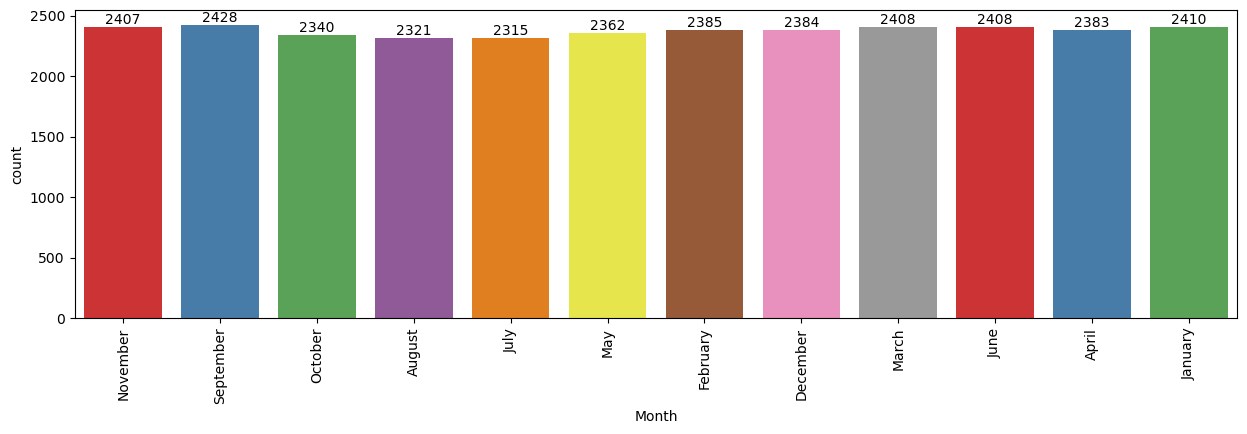

In [29]:
# understanding the distribution and frequency of categorical columns(demographics)
print('Frequency Distribution of categorical columns')
for i in catnames:
    if i == "articleType":
        continue
    plt.figure(figsize=(15, 4))
    ax = sns.countplot(data=df, x=i, palette='Set1')
    plt.xticks(rotation=90)
    for j in ax.containers:
        ax.bar_label(j)

<h3>bivariate analysis</h3>

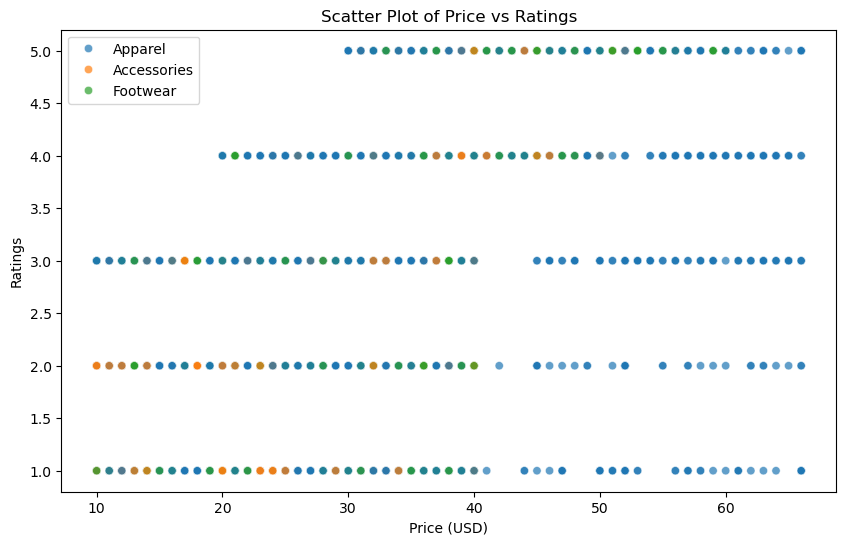

In [30]:
# Scatter plot of Price vs Ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price (USD)', y='ratings', hue='masterCategory', alpha=0.7)
plt.title('Scatter Plot of Price vs Ratings')
plt.xlabel('Price (USD)')
plt.ylabel('Ratings')
plt.legend(loc='upper left')
plt.show()

Text(0.5, 1.0, 'Box Plot of Master category by Price(USD)')

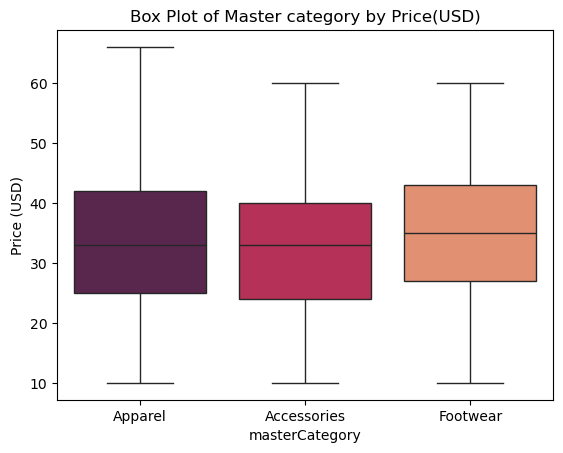

In [31]:
sns.boxplot(df,x='masterCategory',y='Price (USD)',palette='rocket')
plt.title("Box Plot of Master category by Price(USD)")

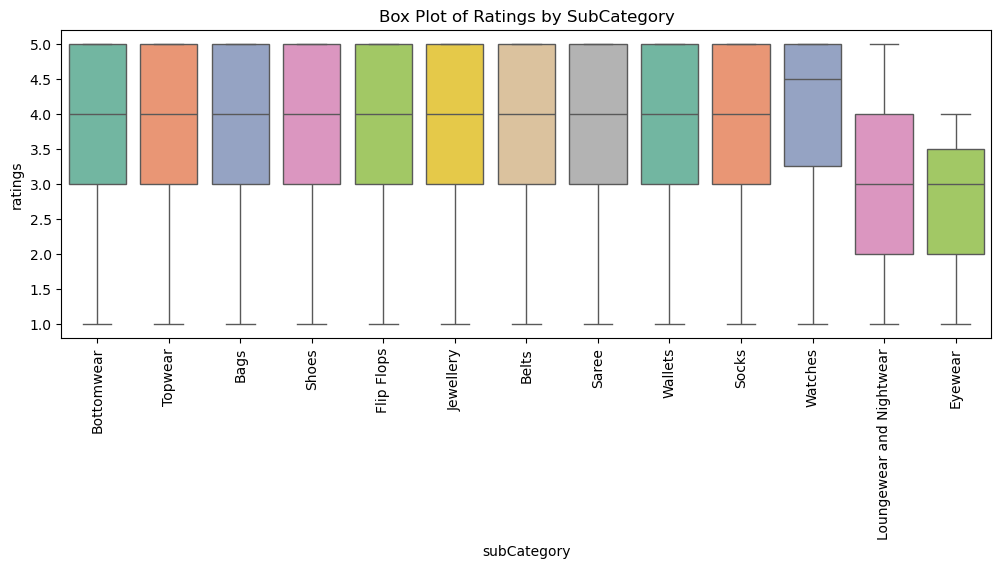

In [32]:
plt.figure(figsize=(12,4))
sns.boxplot(df,x='subCategory',y='ratings',palette='Set2')
plt.title("Box Plot of Ratings by SubCategory")
plt.xticks(rotation=90)
plt.show()

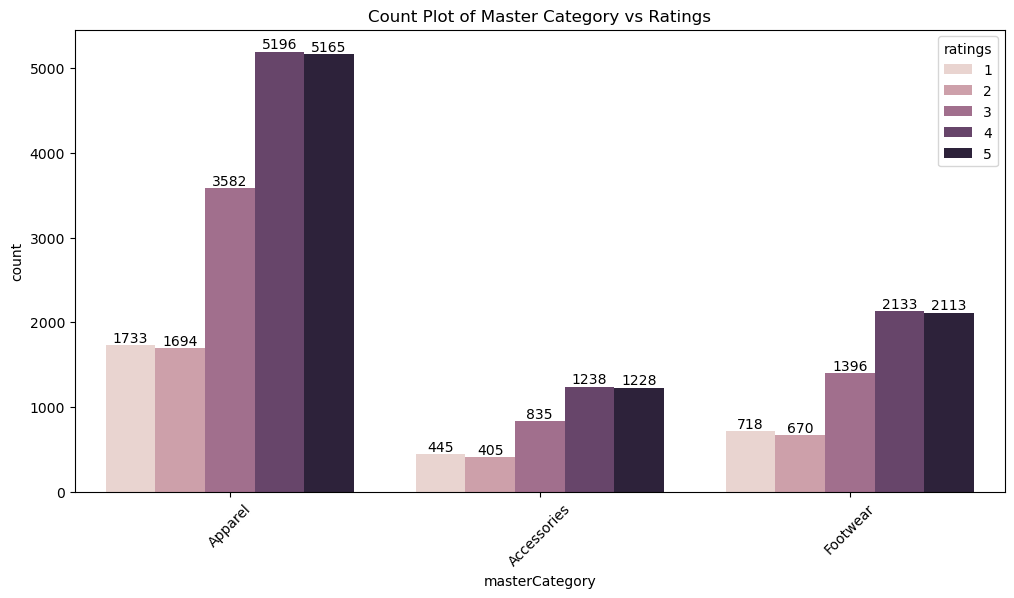

In [33]:
# Count plot of Master Category vs Ratings
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='masterCategory', hue='ratings')
for i in ax.containers:
    plt.bar_label(i)
plt.title('Count Plot of Master Category vs Ratings')
plt.xticks(rotation=45)
plt.show()

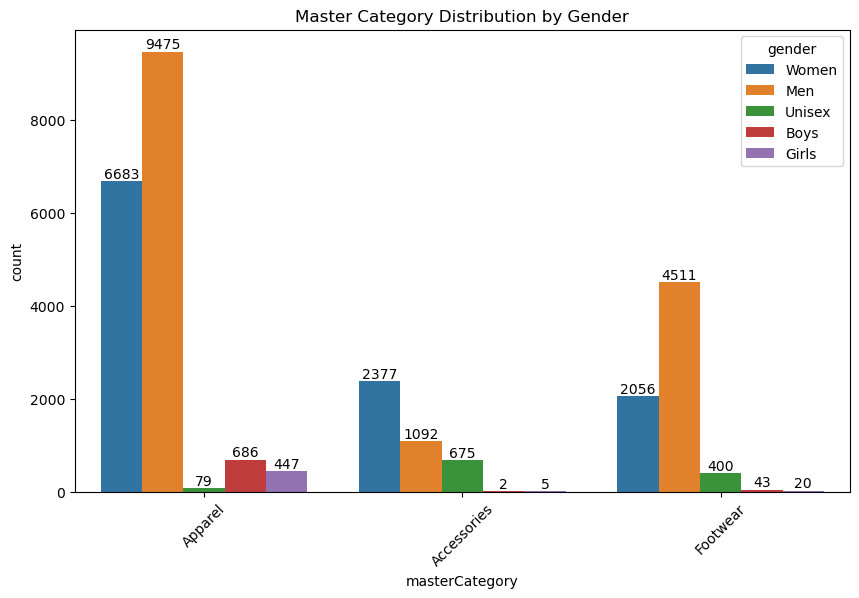

In [34]:
# Master Category vs Gender
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='masterCategory', hue='gender')
for i in ax.containers:
    plt.bar_label(i)
plt.title('Master Category Distribution by Gender')
plt.xticks(rotation=45)
plt.show()

In [35]:
df.subCategory.unique()

array(['Bottomwear', 'Topwear', 'Bags', 'Shoes', 'Flip Flops',
       'Jewellery', 'Belts', 'Saree', 'Wallets', 'Socks', 'Watches',
       'Loungewear and Nightwear', 'Eyewear'], dtype=object)

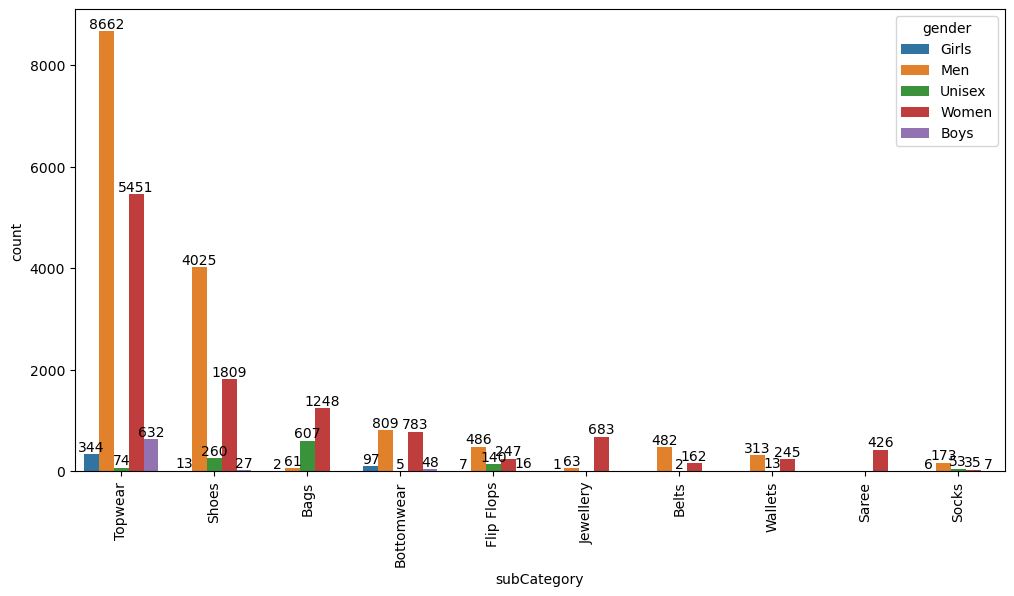

In [36]:
plt.figure(figsize=(12,6))
df_grouped = df.groupby(['subCategory', 'gender']).size().reset_index(name='count')
ax = sns.barplot(data=df_grouped, x='subCategory', y='count', hue='gender', order=df['subCategory'].value_counts().index[:10])
for i in ax.containers:
    plt.bar_label(i)
plt.xticks(rotation=90)
plt.show()

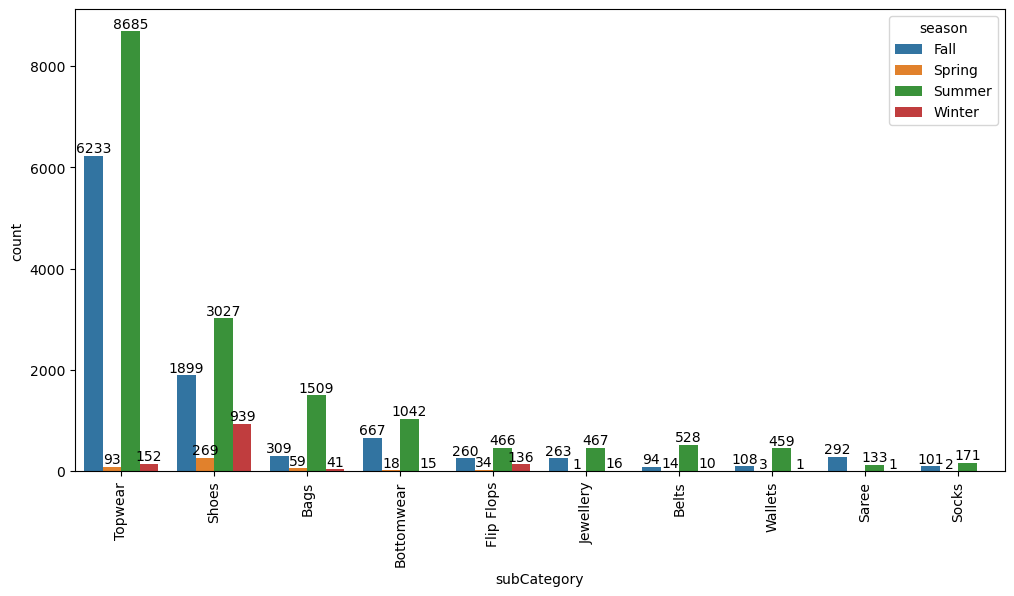

In [37]:
# subcategory vs season
plt.figure(figsize=(12,6))
df_grouped = df.groupby(['subCategory', 'season']).size().reset_index(name='count')
ax = sns.barplot(data=df_grouped, x='subCategory', y='count', hue='season', order=df['subCategory'].value_counts().index[:10])
for i in ax.containers:
    plt.bar_label(i)
plt.xticks(rotation=90)
plt.show()

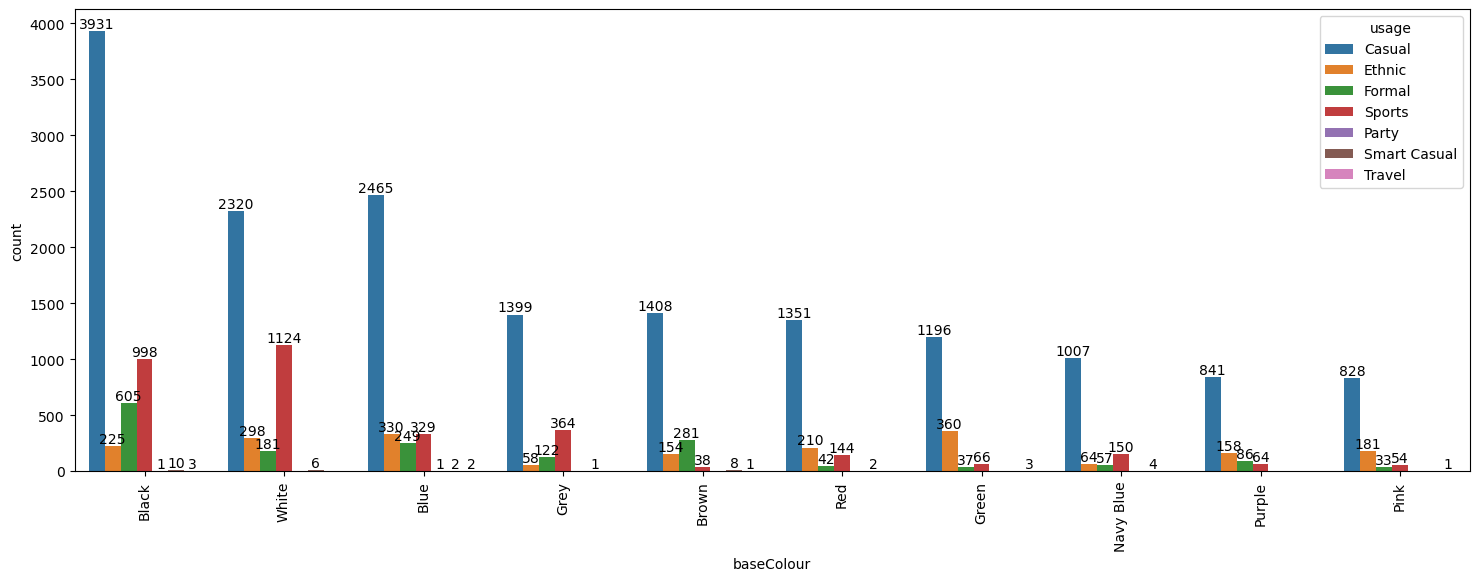

In [38]:
# base colour vs usage
plt.figure(figsize=(18,6))
df_grouped = df.groupby(['baseColour', 'usage']).size().reset_index(name='count')
ax = sns.barplot(data=df_grouped, x='baseColour', y='count', hue='usage', order=df['baseColour'].value_counts().index[:10])
for i in ax.containers:
    plt.bar_label(i)
plt.xticks(rotation=90)
plt.show()

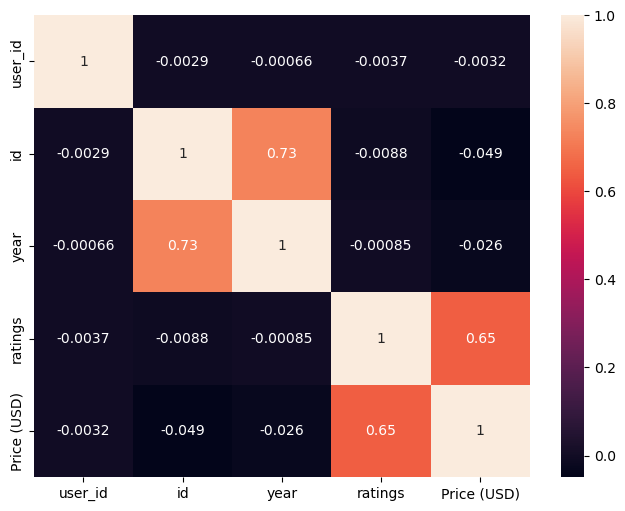

In [39]:
plt.figure(figsize=(8,6))
# Calculate correlation on numeric columns only, including the new 'gender_numeric' column
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True)
plt.show()

<h3>Time-based analysis/Trend analysis based on Month data</h3>

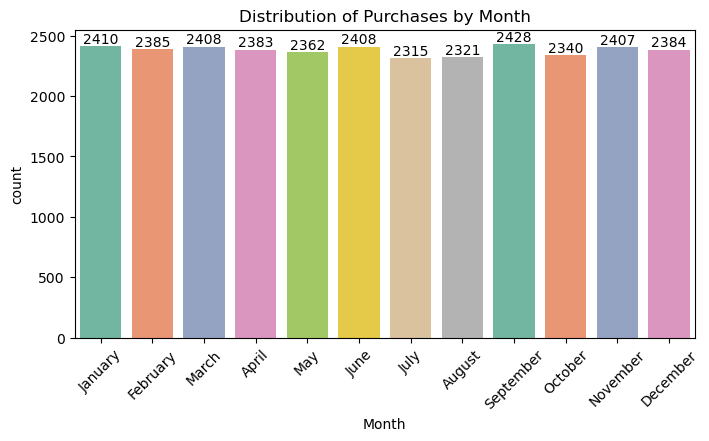

In [40]:
# Count plot for Month
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=df, x='Month', order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
                   palette="Set2")
for i in ax.containers:
    plt.bar_label(i)
plt.title('Distribution of Purchases by Month')
plt.xticks(rotation=45)
plt.show()

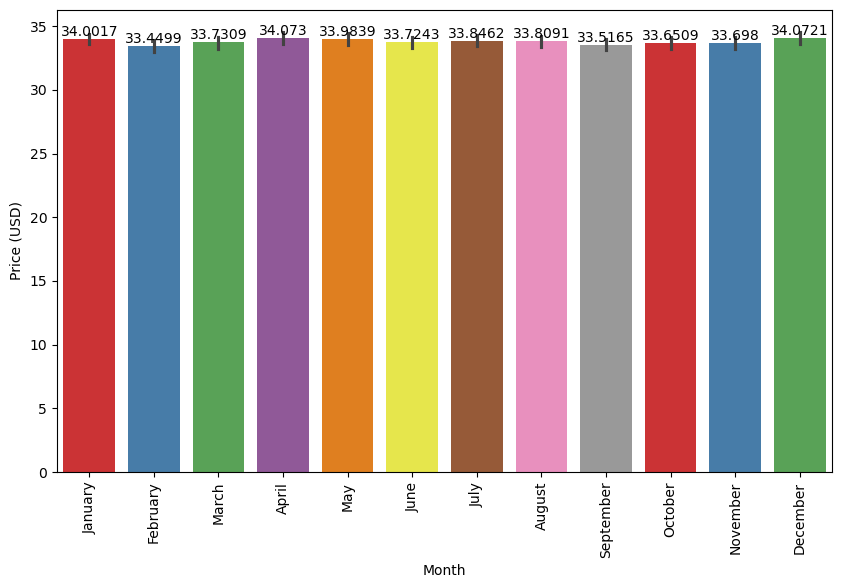

In [41]:
# price(usd) by month
plt.figure(figsize=(10,6))
ax = sns.barplot(data=df,x="Month",y="Price (USD)",palette="Set1",
                 order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
for i in ax.containers:
    plt.bar_label(i)
plt.xticks(rotation=90)
plt.show()

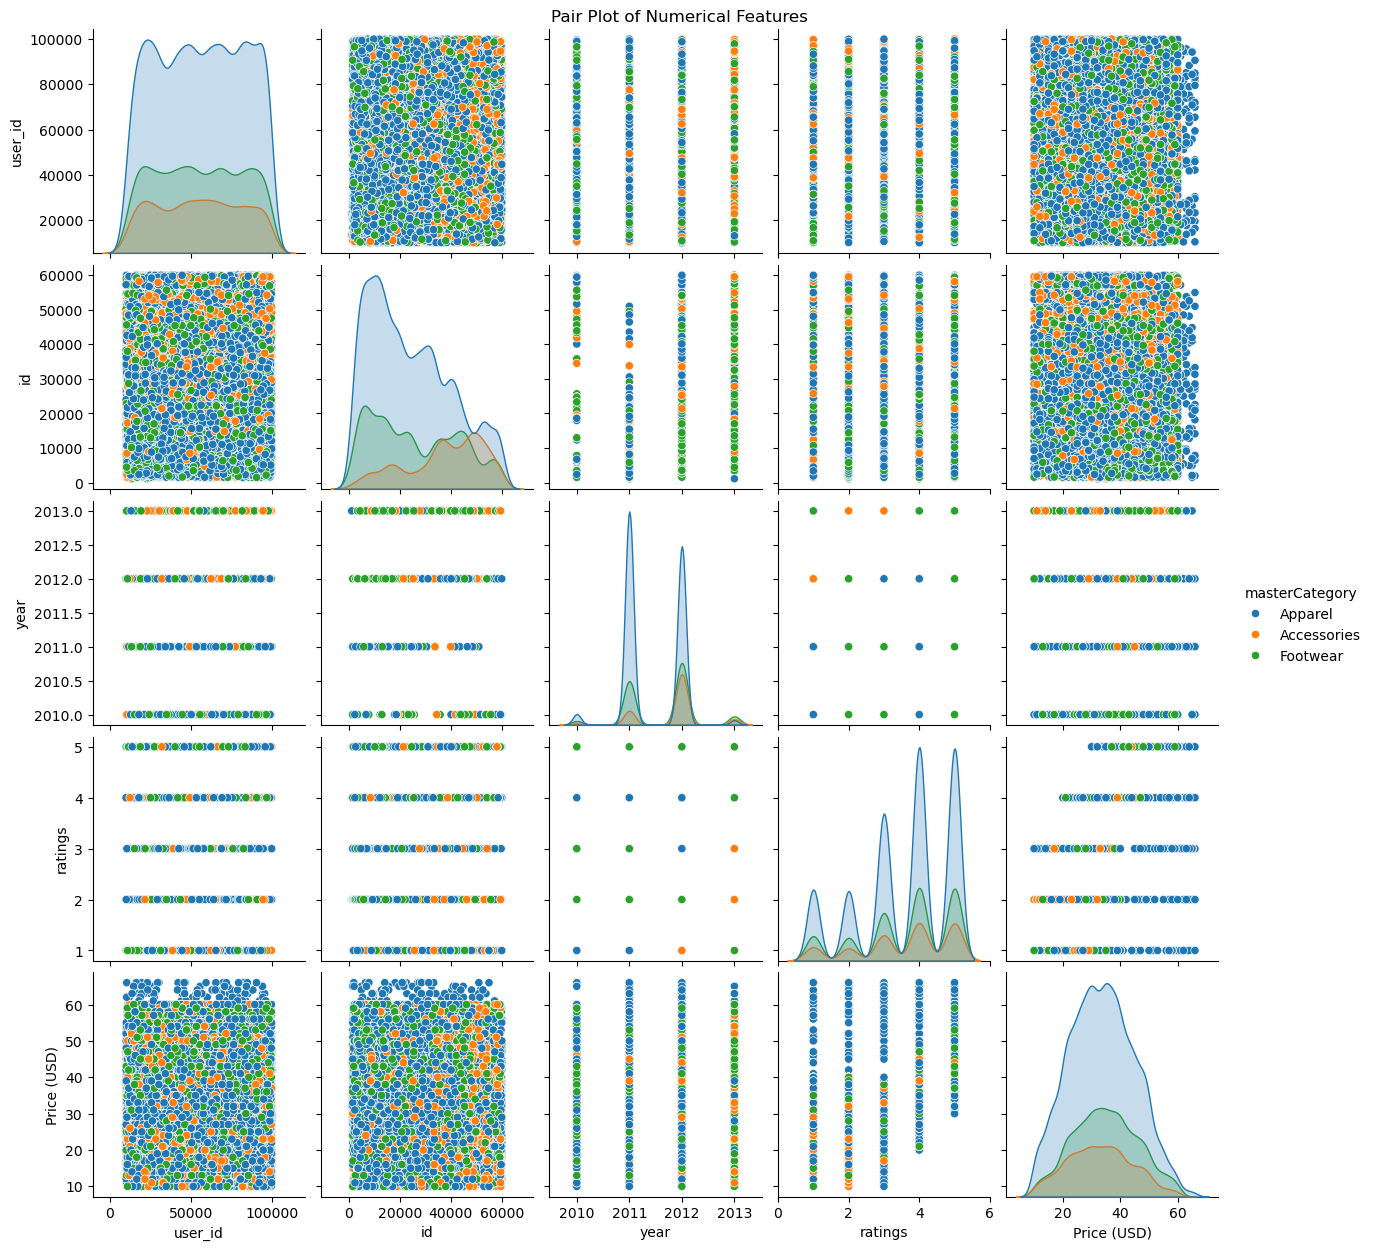

In [42]:
# Reset the index of your DataFrame to ensure it is unique:
df = df.reset_index(drop=True)

# Then, proceed with creating the pair plot:
sns.pairplot(df, diag_kind='kde', hue='masterCategory')
plt.suptitle('Pair Plot of Numerical Features', y=1.0)
plt.show()

<h3>Random oversampling for year column</h3>

In [43]:
df.articleType.value_counts()

articleType
Tshirts          6915
Shirts           3182
Casual Shoes     2467
Sports Shoes     2002
Kurtas           1843
                 ... 
Tablet Sleeve       3
Sunglasses          3
Trolley Bag         3
Dresses             2
Suits               1
Name: count, Length: 69, dtype: int64

In [44]:
from sklearn.utils import resample

# Separate the data into a list of dataframes by year
dfs = [df[df['articleType'] == article] for article in df['articleType'].unique()]

# Determine the target number of samples for each year (e.g., the average count)
target_samples = int(np.mean([len(sub_df) for sub_df in dfs]))

# Resample each year group to the target size
dfs_resampled = [resample(sub_df, replace=True, n_samples=target_samples, random_state=42) for sub_df in dfs]

# Combine all resampled groups into a single dataframe
df_balanced = pd.concat(dfs_resampled)

In [45]:
df_balanced.articleType.value_counts()

articleType
Skirts                 413
Mobile Pouch           413
Bracelet               413
Shrug                  413
Salwar                 413
                      ... 
Sweatshirts            413
Wallets                413
Socks                  413
Necklace and Chains    413
Trolley Bag            413
Name: count, Length: 69, dtype: int64

In [46]:
df_balanced.head()

user_id     id gender masterCategory subCategory articleType  \
23619    10611  41002  Girls        Apparel  Bottomwear      Skirts   
10433    99707  38505  Girls        Apparel  Bottomwear      Skirts   
21205    38199  40428  Women        Apparel  Bottomwear      Skirts   
2871     71644   4929  Women        Apparel  Bottomwear      Skirts   
24103    52247   5019  Women        Apparel  Bottomwear      Skirts   

      baseColour  season    year   usage  \
23619       Blue  Summer  2012.0  Casual   
10433       Blue  Summer  2012.0  Casual   
21205       Grey  Summer  2012.0  Formal   
2871        Blue  Summer  2011.0  Casual   
24103  Navy Blue  Summer  2011.0  Casual   

                                      productDisplayName   filename  \
23619               Gini and Jony Girls Woven Blue Skirt  41002.jpg   
10433               Gini and Jony Girls Woven Blue Skirt  38505.jpg   
21205                      Tonga Women Grey Formal Skirt  40428.jpg   
2871   Gini and Jony Girl's Vanida Blue Dungree Kidswear   4929.jpg   
24103              Levis Kids Girl's Betsy Navy Kidswear   5019.jpg   

                                                    link  ratings  \
23619  http://assets.myntassets.com/v1/images/style/p...        4   
10433  http://assets.myntassets.com/v1/images/style/p...        1   
21205  http://assets.myntassets.com/v1/images/style/p...        5   
2871   http://assets.myntassets.com/v1/images/style/p...        5   
24103  http://assets.myntassets.com/v1/images/style/p...        3   

                                                  review     Month  \
23619              Exceeded expectations, love the fit!.     March   
10433  Cheap fabric, uncomfortable to wear. and I'm v...     April   
21205  High quality fabric, very satisfied. for every...  February   
2871   Amazing quality! Definitely recommend. for eve...  February   
24103              Fair product, but don't expect much..    August   

       Price (USD)  
23619           33  
10433           20  
21205           35  
2871            44  
24103           28

In [47]:
df_balanced.shape

(28497, 17)

# Advanced EDA

<h3>clustering analysis</h3>

In [48]:
for i in catnames:
    print(f'{i}: {df_balanced[i].unique()}')

gender: ['Girls' 'Women' 'Men' 'Unisex' 'Boys']
masterCategory: ['Apparel' 'Accessories' 'Footwear']
subCategory: ['Bottomwear' 'Topwear' 'Bags' 'Shoes' 'Flip Flops' 'Jewellery' 'Belts'
 'Saree' 'Wallets' 'Socks' 'Watches' 'Loungewear and Nightwear' 'Eyewear']
articleType: ['Skirts' 'Kurtas' 'Handbags' 'Tshirts' 'Formal Shoes' 'Flip Flops'
 'Heels' 'Leggings' 'Earrings' 'Shirts' 'Casual Shoes' 'Dupatta' 'Jeans'
 'Tops' 'Ring' 'Flats' 'Suspenders' 'Sports Shoes' 'Shorts' 'Belts'
 'Sarees' 'Jackets' 'Trousers' 'Clutches' 'Track Pants' 'Backpacks'
 'Kurtis' 'Capris' 'Nehru Jackets' 'Sweatshirts' 'Wallets' 'Socks'
 'Necklace and Chains' 'Stockings' 'Patiala' 'Tunics' 'Booties' 'Sweaters'
 'Pendant' 'Duffel Bag' 'Tracksuits' 'Laptop Bag' 'Tights' 'Jeggings'
 'Mobile Pouch' 'Bangle' 'Churidar' 'Swimwear' 'Salwar' 'Shrug' 'Bracelet'
 'Messenger Bag' 'Waist Pouch' 'Waistcoat' 'Blazers' 'Rompers' 'Watches'
 'Night suits' 'Jewellery Set' 'Lounge Pants' 'Nightdress'
 'Salwar and Dupatta' 'Tablet 

In [49]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}

for i in catnames:
    le = LabelEncoder()
    df_balanced[i + "_encoded"] = le.fit_transform(df_balanced[i])
    label_encoders[i] = le

In [50]:
df_balanced.head()

user_id     id gender masterCategory subCategory articleType  \
23619    10611  41002  Girls        Apparel  Bottomwear      Skirts   
10433    99707  38505  Girls        Apparel  Bottomwear      Skirts   
21205    38199  40428  Women        Apparel  Bottomwear      Skirts   
2871     71644   4929  Women        Apparel  Bottomwear      Skirts   
24103    52247   5019  Women        Apparel  Bottomwear      Skirts   

      baseColour  season    year   usage  ...     Month Price (USD)  \
23619       Blue  Summer  2012.0  Casual  ...     March          33   
10433       Blue  Summer  2012.0  Casual  ...     April          20   
21205       Grey  Summer  2012.0  Formal  ...  February          35   
2871        Blue  Summer  2011.0  Casual  ...  February          44   
24103  Navy Blue  Summer  2011.0  Casual  ...    August          28   

      gender_encoded  masterCategory_encoded subCategory_encoded  \
23619              1                       1                   2   
10433              1                       1                   2   
21205              4                       1                   2   
2871               4                       1                   2   
24103              4                       1                   2   

      articleType_encoded  baseColour_encoded  season_encoded  usage_encoded  \
23619                  46                   2               2              0   
10433                  46                   2               2              0   
21205                  46                  13               2              2   
2871                   46                   2               2              0   
24103                  46                  24               2              0   

       Month_encoded  
23619              7  
10433              0  
21205              3  
2871               3  
24103              1  

[5 rows x 25 columns]

In [51]:
# scaling the columns
from sklearn.preprocessing import StandardScaler
features_to_be_scaled = ['gender_encoded', 'masterCategory_encoded', 'subCategory_encoded', 'articleType_encoded',
    'baseColour_encoded', 'season_encoded', 'ratings', 'Price (USD)', 'Month_encoded', 'year','usage_encoded']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_balanced[features_to_be_scaled])

In [52]:
df_scaled

array([[-1.81055425,  0.39082557, -0.896319  , ...,  0.38807111,
         0.39736146, -0.4913342 ],
       [-1.81055425,  0.39082557, -0.896319  , ..., -1.63767957,
         0.39736146, -0.4913342 ],
       [ 0.83739876,  0.39082557, -0.896319  , ..., -0.76950071,
         0.39736146,  0.91862005],
       ...,
       [-0.04525224, -1.29460972, -1.40533967, ...,  1.54564293,
         0.39736146, -0.4913342 ],
       [-0.04525224, -1.29460972, -1.40533967, ...,  0.96685702,
         0.39736146, -0.4913342 ],
       [-0.04525224, -1.29460972, -1.40533967, ...,  0.96685702,
         0.39736146, -0.4913342 ]])

In [53]:
# applying pca for dimanesionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

In [54]:
# elbow method to decide clusters for k-means clustering analysis
from sklearn.cluster import KMeans
wcss = [] # within cluster sum of squares
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(pca_result)
    wcss.append(kmeans.inertia_)

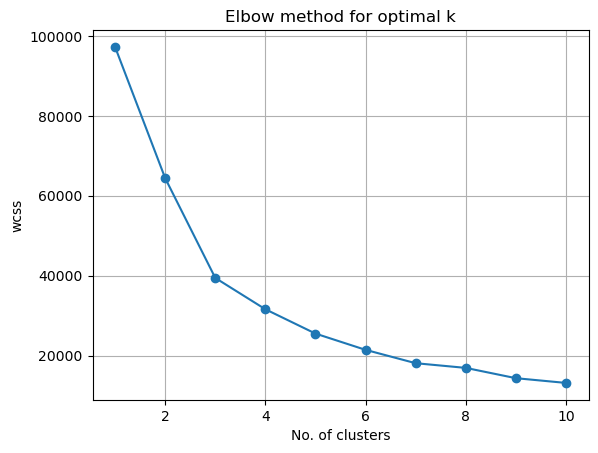

In [55]:
plt.plot(range(1,11),wcss,marker='o')
plt.xlabel("No. of clusters")
plt.ylabel("wcss")
plt.title("Elbow method for optimal k")
plt.grid(True)
plt.show()

In [56]:
df_pca = pd.DataFrame(pca_result,columns=['pca1','pca2'])
df_pca

pca1      pca2
0     -0.074378  0.463121
1     -0.073476 -1.834867
2      0.156784  1.073522
3     -0.219220  1.660549
4      0.001249 -0.601282
...         ...       ...
28492  1.000654  1.187701
28493  1.073136  0.112957
28494  1.067405  0.922573
28495  1.073136  0.112957
28496  1.073136  0.112957

[28497 rows x 2 columns]

In [57]:
kmeans = KMeans(n_clusters=3,random_state=42)
df_pca["cluster"] = kmeans.fit_predict(df_pca)
df_pca

pca1      pca2  cluster
0     -0.074378  0.463121        2
1     -0.073476 -1.834867        0
2      0.156784  1.073522        2
3     -0.219220  1.660549        2
4      0.001249 -0.601282        0
...         ...       ...      ...
28492  1.000654  1.187701        2
28493  1.073136  0.112957        2
28494  1.067405  0.922573        2
28495  1.073136  0.112957        2
28496  1.073136  0.112957        2

[28497 rows x 3 columns]

In [58]:
df_pca.isnull().sum()

pca1       0
pca2       0
cluster    0
dtype: int64

In [59]:
df_balanced.reset_index(drop=True, inplace=True)
df_pca.reset_index(drop=True, inplace=True)

# Now you can safely add the cluster column
df_balanced['cluster'] = df_pca['cluster']

In [60]:
df.isnull().sum()

user_id               0
id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
filename              0
link                  0
ratings               0
review                0
Month                 0
Price (USD)           0
dtype: int64

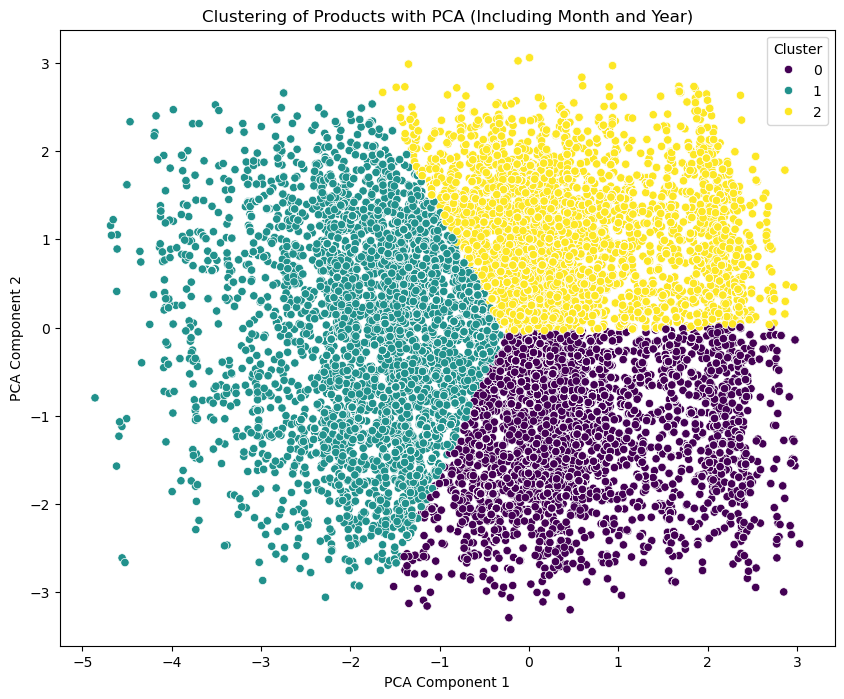

In [61]:
# Visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df_pca,
    x='pca1', y='pca2',
    hue='cluster',
    palette='viridis'
)
plt.title('Clustering of Products with PCA (Including Month and Year)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [62]:
df_balanced.head()

user_id     id gender masterCategory subCategory articleType baseColour  \
0    10611  41002  Girls        Apparel  Bottomwear      Skirts       Blue   
1    99707  38505  Girls        Apparel  Bottomwear      Skirts       Blue   
2    38199  40428  Women        Apparel  Bottomwear      Skirts       Grey   
3    71644   4929  Women        Apparel  Bottomwear      Skirts       Blue   
4    52247   5019  Women        Apparel  Bottomwear      Skirts  Navy Blue   

   season    year   usage  ... Price (USD) gender_encoded  \
0  Summer  2012.0  Casual  ...          33              1   
1  Summer  2012.0  Casual  ...          20              1   
2  Summer  2012.0  Formal  ...          35              4   
3  Summer  2011.0  Casual  ...          44              4   
4  Summer  2011.0  Casual  ...          28              4   

  masterCategory_encoded  subCategory_encoded articleType_encoded  \
0                      1                    2                  46   
1                      1                    2                  46   
2                      1                    2                  46   
3                      1                    2                  46   
4                      1                    2                  46   

  baseColour_encoded  season_encoded  usage_encoded  Month_encoded  cluster  
0                  2               2              0              7        2  
1                  2               2              0              0        0  
2                 13               2              2              3        2  
3                  2               2              0              3        2  
4                 24               2              0              1        0  

[5 rows x 26 columns]

In [63]:
df_balanced.shape

(28497, 26)

In [64]:
for i in catnames:
    print(f"{i}: {df_balanced[i + '_encoded'].unique()}")

gender: [1 4 2 3 0]
masterCategory: [1 0 2]
subCategory: [ 2 10  0  8  4  5  1  7 11  9 12  6  3]
articleType: [46 23 17 63 16 15 18 26 13 43  7 12 20 58 38 14 52 48 44  2 42 19 62  9
 59  0 24  6 32 54 67 47 31 49 35 64  4 53 36 11 60 25 57 21 30  1  8 55
 40 45  5 29 65 66  3 39 68 33 22 28 34 41 56 10 37 27 51 50 61]
baseColour: [ 2 13 24 30 32  0  1  9 41  4 39 31 12 42 26  6 22 33 23 28 19 18 40 16
 29 27 11  7  3 35 15 20 38  5 37  8 21 25 34 17 14 36 10]
season: [2 0 3 1]
usage: [0 2 1 5 6 4 3]
Month: [ 7  0  3  1  2  4 10  6  8 11  5  9]


# Image Processing

In [65]:
image_dir = r"C:\Users\tarus\infosys_springboard_internship\Fashion_Assistant_Project\images"

In [66]:
import os
df_balanced = df_balanced[df_balanced['filename'].apply(lambda x: os.path.exists(f'images/{x}'))]

In [67]:
df_balanced.shape

(28084, 26)

In [68]:
# Create a list of full image paths
image_paths = [os.path.join(image_dir, image_id) for image_id in df_balanced['filename']]

In [69]:
import os
path_not_exists = []
for path in image_paths:
    if not os.path.exists(path):
        print(f"File does not exist: {path}")
        path_not_exists.append(path[30:])

path_not_exists

[]

In [70]:
df_balanced.to_csv("datasets/df_balanced.csv", index=False)

In [71]:
# df_balanced = df_balanced.sample(5000, random_state=42)
# df_balanced.shape

In [72]:
import numpy as np
import os
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array


In [73]:
# Load pretrained ResNet50 model
resnet = ResNet50(weights='imagenet', include_top=False, pooling='avg')
feature_model = Model(inputs=resnet.input, outputs=resnet.output)

def extract_features(img_path):
    try:
        img = load_img(img_path, target_size=(224, 224))
        x = img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        feat = feature_model.predict(x, verbose=0)
        return feat.flatten()
    except:
        return np.zeros(2048)


In [156]:
df_balanced.articleType.value_counts()

articleType
Skirts           413
Jeggings         413
Shrug            413
Salwar           413
Swimwear         413
                ... 
Nehru Jackets    413
Sweatshirts      413
Wallets          413
Socks            413
Trolley Bag      413
Name: count, Length: 68, dtype: int64

In [157]:
import tqdm
import os

features = []
for fname in tqdm.tqdm(df_balanced['filename']):
    # tqdm is for getting the progress bar
    path = os.path.join('images', fname)
    features.append(extract_features(path))

X = np.array(features)


100%|██████████| 28084/28084 [1:04:54<00:00,  7.21it/s]


In [158]:
# df_balanced.baseColour.unique()

In [159]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

def train_label_predictors(X, df, target_columns):
    trained_models = {}
    label_encoders = {}

    for target in target_columns:
        print(f"\nTraining model for: {target}")

        # Encode target labels
        le = LabelEncoder()
        y = le.fit_transform(df[target])
        label_encoders[target] = le

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train classifier
        clf = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
        clf.fit(X_train, y_train)
        trained_models[target] = clf

        # Evaluate
        y_pred = clf.predict(X_test)
        print(f"\nClassification Report for {target}:")
        print(classification_report(
            y_test, y_pred,
            labels=le.transform(le.classes_),
            target_names=le.classes_
        ))

    return trained_models, label_encoders


In [ ]:
target_cols = ['articleType','subCategory', 'baseColour', 'gender', 'season', 'usage']

In [ ]:
models, encoders = train_label_predictors(X, df_balanced, target_cols)

In [161]:
import joblib
import os

def save_models(models, encoders, save_dir='saved_models'):
    os.makedirs(save_dir, exist_ok=True)
    
    for label in models:
        joblib.dump(models[label], f'{save_dir}/{label}_model.pkl')
        joblib.dump(encoders[label], f'{save_dir}/{label}_encoder.pkl')
    
    print("All models and encoders saved to:", save_dir)


In [162]:
save_models(models, encoders)


All models and encoders saved to: saved_models


In [74]:
from sklearn.metrics.pairwise import cosine_similarity
from PIL import Image
import matplotlib.pyplot as plt
import os

# Mapping rules (same as earlier)
gender_map = {
    'Women': ['Women', 'Unisex'],
    'Men': ['Men', 'Unisex'],
    'Unisex': ['Unisex'],
    'Boys': ['Boys', 'Unisex'],
    'Girls': ['Girls', 'Unisex']
}

season_map = {
    'Summer': ['Summer', 'Spring'],
    'Spring': ['Spring', 'Summer'],
    'Fall': ['Fall', 'Winter'],
    'Winter': ['Winter', 'Fall']
}

# Colour groupings
base_colour_map = {
    'White': ['Black', 'Navy Blue', 'Red', 'Pink', 'Beige', 'Grey', 'Blue', 'Lavender', 'Olive'],
    'Lavender': ['White', 'Beige', 'Grey', 'Pink', 'Navy Blue', 'Mauve'],
    'Steel': ['White', 'Black', 'Grey', 'Navy Blue', 'Silver'],
    'Black': ['White', 'Beige', 'Red', 'Blue', 'Pink', 'Mustard', 'Olive', 'Grey'],
    'Brown': ['Beige', 'White', 'Olive', 'Mustard', 'Cream', 'Khaki', 'Tan'],
    'Grey': ['Black', 'White', 'Red', 'Blue', 'Green', 'Beige', 'Pink'],
    'Blue': ['White', 'Beige', 'Red', 'Mustard', 'Grey', 'Pink', 'Yellow'],
    'Green': ['White', 'Beige', 'Brown', 'Mustard', 'Olive'],
    'Silver': ['Black', 'White', 'Grey', 'Navy Blue', 'Purple'],
    'Beige': ['Black', 'White', 'Blue', 'Pink', 'Red', 'Olive', 'Cream'],
    'Navy Blue': ['White', 'Beige', 'Pink', 'Yellow', 'Grey', 'Mustard', 'Lavender'],
    'Purple': ['White', 'Beige', 'Pink', 'Grey', 'Lavender', 'Silver'],
    'Red': ['Black', 'White', 'Blue', 'Beige', 'Grey', 'Gold'],
    'Pink': ['White', 'Beige', 'Grey', 'Navy Blue', 'Lavender', 'Cream'],
    'Teal': ['White', 'Beige', 'Grey', 'Brown', 'Sea Green'],
    'Gold': ['Black', 'White', 'Beige', 'Red', 'Maroon', 'Burgundy'],
    'Nude': ['White', 'Beige', 'Cream', 'Brown', 'Olive'],
    'Olive': ['Beige', 'White', 'Brown', 'Black', 'Mustard', 'Khaki', 'Rust'],
    'Tan': ['White', 'Beige', 'Brown', 'Olive', 'Cream'],
    'Maroon': ['White', 'Beige', 'Black', 'Gold', 'Cream', 'Peach'],
    'Yellow': ['Navy Blue', 'Black', 'White', 'Grey', 'Blue', 'Beige'],
    'Taupe': ['White', 'Beige', 'Brown', 'Cream', 'Pink'],
    'Orange': ['White', 'Beige', 'Blue', 'Black', 'Cream', 'Grey'],
    'Off White': ['Black', 'Beige', 'Grey', 'Blue', 'Olive'],
    'Grey Melange': ['Black', 'White', 'Beige', 'Cream'],
    'Peach': ['White', 'Beige', 'Pink', 'Grey', 'Maroon'],
    'Multi': ['White', 'Black', 'Beige', 'Grey', 'Navy Blue'],  # catch-all
    'Cream': ['Beige', 'White', 'Brown', 'Pink', 'Maroon'],
    'Coffee Brown': ['Beige', 'White', 'Cream', 'Olive', 'Khaki'],
    'Sea Green': ['White', 'Beige', 'Blue', 'Grey', 'Teal'],
    'Turquoise Blue': ['White', 'Beige', 'Navy Blue', 'Grey', 'Sea Green'],
    'Mustard': ['Navy Blue', 'White', 'Black', 'Beige', 'Olive', 'Brown'],
    'Rust': ['Beige', 'White', 'Brown', 'Olive', 'Khaki'],
    'Khaki': ['White', 'Beige', 'Brown', 'Olive', 'Cream'],
    'Charcoal': ['White', 'Beige', 'Grey', 'Black'],
    'Magenta': ['Black', 'White', 'Beige', 'Navy Blue', 'Gold'],
    'Mauve': ['White', 'Beige', 'Lavender', 'Grey', 'Pink'],
    'Bronze': ['White', 'Black', 'Beige', 'Gold', 'Brown'],
    'Burgundy': ['White', 'Beige', 'Black', 'Cream', 'Gold', 'Maroon'],
}



In [75]:
def get_complementary_base_colours(base_colour):
    return base_colour_map.get(base_colour, [base_colour])

def get_matching_gender(gender):
    return gender_map.get(gender, [gender])

def get_matching_season(season):
    return season_map.get(season, [season])


In [ ]:
complementary_map = {
    'Tshirts': ['Jeans', 'Track Pants', 'Casual Shoes', 'Backpacks', 'Watches', 'Shorts', 'Sneakers'],
    'Shirts': ['Trousers', 'Formal Shoes', 'Belts', 'Watches', 'Wallets', 'Blazers'],
    'Kurtas': ['Leggings', 'Dupatta', 'Earrings', 'Heels', 'Churidar', 'Bangle'],
    'Kurtis': ['Jeggings', 'Dupatta', 'Bracelet', 'Heels', 'Earrings'],
    'Tunics': ['Leggings', 'Flats', 'Handbags', 'Bracelet', 'Jeggings'],
    'Tops': ['Skirts', 'Capris', 'Earrings', 'Heels', 'Bracelet', 'Pendant'],
    'Sweatshirts': ['Track Pants', 'Sneakers', 'Backpacks', 'Jeans', 'Rain Jacket'],
    'Jackets': ['Jeans', 'Tshirts', 'Booties', 'Sweaters', 'Track Pants'],
    'Shrug': ['Tops', 'Tunics', 'Jeggings', 'Earrings', 'Bracelet'],
    'Blazers': ['Shirts', 'Trousers', 'Formal Shoes', 'Wallets', 'Laptop Bag'],
    'Nehru Jackets': ['Kurtas', 'Trousers', 'Formal Shoes', 'Watches', 'Belts'],

    'Jeans': ['Tshirts', 'Sweatshirts', 'Casual Shoes', 'Shrug', 'Sweaters', 'Backpacks'],
    'Trousers': ['Shirts', 'Belts', 'Formal Shoes', 'Watches', 'Wallets', 'Blazers'],
    'Track Pants': ['Sweatshirts', 'Sports Shoes', 'Rain Jacket', 'Duffel Bag', 'Tshirts'],
    'Capris': ['Tshirts', 'Flats', 'Tops', 'Bracelet', 'Shrug'],
    'Jeggings': ['Tunics', 'Shrug', 'Kurtis', 'Tops', 'Heels'],
    'Leggings': ['Kurtas', 'Tunics', 'Shrug', 'Dupatta', 'Bracelet'],
    'Patiala': ['Kurtas', 'Dupatta', 'Heels', 'Bracelet', 'Ring'],
    'Salwar': ['Kurtas', 'Dupatta', 'Heels', 'Ring', 'Necklace and Chains'],
    'Churidar': ['Kurtas', 'Dupatta', 'Heels', 'Bangle', 'Pendant'],
    'Skirts': ['Tops', 'Heels', 'Earrings', 'Stockings', 'Bracelet'],
    'Shorts': ['Tshirts', 'Flip Flops', 'Casual Shoes', 'Waist Pouch', 'Backpacks'],
    'Lounge Pants': ['Tshirts', 'Flip Flops', 'Duffel Bag', 'Sweatshirts', 'Sports Shoes'],

    'Formal Shoes': ['Shirts', 'Trousers', 'Blazers', 'Belts', 'Socks'],
    'Casual Shoes': ['Tshirts', 'Jeans', 'Shorts', 'Socks', 'Sneakers'],
    'Sports Shoes': ['Track Pants', 'Tshirts', 'Duffel Bag', 'Socks', 'Sweatshirts'],
    'Flip Flops': ['Shorts', 'Lounge Pants', 'Swimwear', 'Tshirts', 'Mobile Pouch'],
    'Heels': ['Dresses', 'Skirts', 'Kurtas', 'Sarees', 'Lehenga Choli'],
    'Flats': ['Tunics', 'Capris', 'Tops', 'Jeggings', 'Shrug'],
    'Booties': ['Sweaters', 'Jeans', 'Jackets', 'Tops', 'Tights'],

    'Dupatta': ['Kurtas', 'Salwar', 'Patiala', 'Churidar', 'Tights'],
    'Sarees': ['Blouses', 'Jewellery Set', 'Heels', 'Ring', 'Necklace and Chains'],
    'Lehenga Choli': ['Dupatta', 'Jewellery Set', 'Heels', 'Bangle', 'Ring'],
    'Salwar and Dupatta': ['Kurtas', 'Heels', 'Earrings', 'Pendant', 'Bracelet'],

    'Dresses': ['Heels', 'Clutches', 'Earrings', 'Bracelet', 'Pendant', 'Handbags'],
    'Night suits': ['Slippers', 'Robe', 'Nightdress', 'Duffel Bag', 'Mobile Pouch'],
    'Nightdress': ['Slippers', 'Robe', 'Earrings', 'Bracelet', 'Socks'],
    'Rompers': ['Sneakers', 'Backpacks', 'Tops', 'Bracelet', 'Heels'],
    'Swimwear': ['Flip Flops', 'Mobile Pouch', 'Backpacks', 'Shorts', 'Waist Pouch'],
    'Tracksuits': ['Sports Shoes', 'Duffel Bag', 'Backpacks', 'Tshirts', 'Waist Pouch'],

    'Wallets': ['Shirts', 'Trousers', 'Belts', 'Watches', 'Formal Shoes'],
    'Belts': ['Shirts', 'Trousers', 'Wallets', 'Blazers', 'Formal Shoes'],
    'Watches': ['Tshirts', 'Shirts', 'Blazers', 'Jeans', 'Kurtas'],
    'Backpacks': ['Tshirts', 'Jeans', 'Sweatshirts', 'Shorts', 'Duffel Bag'],
    'Messenger Bag': ['Casual Shirts', 'Trousers', 'Wallets', 'Watches', 'Shoes'],
    'Handbags': ['Tops', 'Dresses', 'Bracelet', 'Heels', 'Tunics'],
    'Clutches': ['Dresses', 'Heels', 'Jewellery Set', 'Pendant', 'Bracelet'],
    'Duffel Bag': ['Tracksuits', 'Lounge Pants', 'Sports Shoes', 'Tshirts', 'Sweatshirts'],
    'Trolley Bag': ['Travel Accessory', 'Duffel Bag', 'Backpacks', 'Shoes', 'Casual Wear'],

    'Jewellery Set': ['Sarees', 'Lehenga Choli', 'Dresses', 'Clutches', 'Earrings', 'Tops', 'Tights', 'Skirts', 'Flip Flops'],
    'Earrings': ['Tops', 'Dresses', 'Sarees', 'Kurtas', 'Kurtis', 'Tights', 'Salwar and Dupatta'],
    'Necklace and Chains': ['Kurtas', 'Sarees', 'Lehenga Choli', 'Dresses', 'Tops', 'Tights'],
    'Bangle': ['Lehenga Choli', 'Kurtas', 'Tights', 'Bracelet', 'Sarees', 'Tops'],
    'Bracelet': ['Kurtis', 'Dresses', 'Tops', 'Shrug', 'Tunics'],
    'Pendant': ['Tops', 'Dresses', 'Churidar', 'Bracelet', 'Earrings', 'Jeans'],
    'Ring': ['Sarees', 'Kurtas', 'Lehenga Choli', 'Bracelet', 'Bangle', 'Tops', 'Jeans'],
    
    'Tablet Sleeve': ['Formal Outfits', 'Blazers', 'Laptop Bag', 'Messenger Bag', 'Trousers'],
    'Laptop Bag': ['Shirts', 'Blazers', 'Belts', 'Trousers', 'Watches'],
    'Mobile Pouch': ['Casual Wear', 'Shorts', 'Duffel Bag', 'Flip Flops', 'Nightdress'],
    'Waist Pouch': ['Tracksuits', 'Streetwear', 'Shorts', 'Sneakers', 'Tshirts'],
    'Waistcoat': ['Shirts', 'Blazers', 'Trousers', 'Formal Shoes', 'Belts'],

    'Rain Jacket': ['Track Pants', 'Sweatshirts', 'Sports Shoes', 'Tshirts', 'Duffel Bag'],
    'Sweaters': ['Jeans', 'Booties', 'Tops', 'Leggings', 'Jackets'],
    'Stockings': ['Skirts', 'Dresses', 'Booties', 'Heels', 'Tights'],

    'Tights': ['Kurtas', 'Heels', 'Bracelet', 'Dupatta', 'Sweaters'],
    'Socks': ['Formal Shoes', 'Casual Shoes', "Sports Shoes", 'Tshirts', 'Jeans', 'Track Pants'],
    'Suspenders': ['Shirts', 'Formal Shoes', 'Trousers', 'Socks', 'Blazers']
}


In [123]:
uploaded_img = r"C:\Users\tarus\infosys_springboard_internship\images\48748.jpg"

In [124]:
import os
import joblib
import gzip

models = {}
encoders = {}

for file in os.listdir('saved_models/'):
    path = os.path.join('saved_models/', file)
    if file.endswith("model.pkl.gz"):
        key = file.replace("_model.pkl.gz", "")
        with gzip.open(path, 'rb') as f:
            models[key] = joblib.load(f)
    
    elif file.endswith("encoder.pkl.gz"):
        key = file.replace("_encoder.pkl.gz", "")
        with gzip.open(path, 'rb') as f:
            encoders[key] = joblib.load(f)

In [125]:
models

{'articleType': RandomForestClassifier(class_weight='balanced', random_state=42),
 'baseColour': RandomForestClassifier(class_weight='balanced', random_state=42),
 'gender': RandomForestClassifier(class_weight='balanced', random_state=42),
 'season': RandomForestClassifier(class_weight='balanced', random_state=42),
 'subCategory': RandomForestClassifier(class_weight='balanced', random_state=42),
 'usage': RandomForestClassifier(class_weight='balanced', random_state=42)}

In [126]:
encoders

{'articleType': LabelEncoder(),
 'baseColour': LabelEncoder(),
 'gender': LabelEncoder(),
 'season': LabelEncoder(),
 'subCategory': LabelEncoder(),
 'usage': LabelEncoder()}

In [127]:
# Suppose you extracted features from a new uploaded image:
new_feat = extract_features(uploaded_img).reshape(1, -1)
preds = {}

# Predict one by one:
for target in target_cols:
    pred_class = encoders[target].inverse_transform(
        [models[target].predict(new_feat)[0]]
    )[0]
    preds[target] = pred_class

preds

{'articleType': 'Bangle',
 'subCategory': 'Jewellery',
 'baseColour': 'Silver',
 'gender': 'Women',
 'season': 'Summer',
 'usage': 'Casual'}

In [128]:
from sklearn.preprocessing import OneHotEncoder

# Features to use for similarity
similarity_cols = ['baseColour', 'gender', 'season', 'usage']

# Fit encoder once on your DataFrame
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(df_balanced[similarity_cols])


OneHotEncoder(handle_unknown='ignore')

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import os
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

def recommend_outfit_items_text_features(pred_labels, df, image_dir='images', top_k=5):
    subcat      = pred_labels['subCategory']
    article     = pred_labels['articleType']
    base_colour = pred_labels['baseColour']
    gender      = pred_labels['gender']
    season      = pred_labels['season']
    usage       = pred_labels['usage']

    # Matching gender and season logic
    valid_genders = get_matching_gender(gender)
    valid_seasons = get_matching_season(season)
    valid_colours = get_complementary_base_colours(base_colour)

    # Filter based on rules
    filtered_df = df[
        (df['subCategory'] != subcat) &
        (df['gender'].isin(valid_genders)) &
        (df['season'].isin(valid_seasons)) &
        (df['baseColour'].isin(valid_colours)) &
        (df['usage'] == usage)
    ].copy()

    if filtered_df.empty:
        print("No complementary items found.")
        return

    print(f"{len(filtered_df)} items after filtering.")

    # One-hot encode catalogue and input
    input_row = pd.DataFrame([{
        'baseColour': base_colour,
        'gender'    : gender,
        'season'    : season,
        'usage'     : usage
    }])

    X_input = encoder.transform(input_row[similarity_cols]).toarray()
    X_cat   = encoder.transform(filtered_df[similarity_cols]).toarray()

    # Compute cosine similarity
    sims = cosine_similarity(X_input, X_cat)[0]
    filtered_df['similarity'] = sims

    # Only keep valid complementary subcategories
    valid_articles = complementary_map.get(article)
    filtered_df = filtered_df[filtered_df['articleType'].isin(valid_articles)]

    if filtered_df.empty:
        print("No matching subcategories found.")
        return

    # Get top 1 per subcategory
    top_items = (
        filtered_df
        .sort_values('similarity', ascending=False)
        .groupby('subCategory', as_index=False)
        .first()
        .sort_values('similarity', ascending=False)
        .head(top_k)
    )

    # Show results
    recommendations = []
    for _, row in top_items.iterrows():
        recommendations.append(row['filename'])
        print(f"\n{row['productDisplayName']}")
        print(f"→ SubCategory: {row['subCategory']}, Article Type: {row['articleType']}, Colour: {row['baseColour']}")
        print(f"→ Gender: {row['gender']}, Season: {row['season']}, Usage: {row['usage']}")
        img_path = os.path.join(image_dir, row['filename'])
        if os.path.exists(img_path):
            plt.figure(figsize=(3,3))
            plt.imshow(Image.open(img_path))
            plt.axis('off')
            plt.title(f"{row['subCategory']} - {row['baseColour']}")
            plt.show()
    
    return recommendations


In [135]:
df_balanced.articleType.unique()

array(['Skirts', 'Kurtas', 'Handbags', 'Tshirts', 'Formal Shoes',
       'Flip Flops', 'Heels', 'Leggings', 'Earrings', 'Shirts',
       'Casual Shoes', 'Dupatta', 'Jeans', 'Tops', 'Ring', 'Flats',
       'Suspenders', 'Sports Shoes', 'Shorts', 'Belts', 'Sarees',
       'Jackets', 'Trousers', 'Clutches', 'Track Pants', 'Backpacks',
       'Kurtis', 'Capris', 'Nehru Jackets', 'Sweatshirts', 'Wallets',
       'Socks', 'Necklace and Chains', 'Stockings', 'Patiala', 'Tunics',
       'Booties', 'Sweaters', 'Pendant', 'Duffel Bag', 'Tracksuits',
       'Laptop Bag', 'Tights', 'Jeggings', 'Mobile Pouch', 'Bangle',
       'Churidar', 'Swimwear', 'Salwar', 'Shrug', 'Bracelet',
       'Messenger Bag', 'Waist Pouch', 'Waistcoat', 'Blazers', 'Rompers',
       'Watches', 'Night suits', 'Jewellery Set', 'Lounge Pants',
       'Nightdress', 'Salwar and Dupatta', 'Tablet Sleeve', 'Dresses',
       'Rain Jacket', 'Lehenga Choli', 'Sunglasses', 'Trolley Bag'],
      dtype=object)

Subcategory:  Topwear
Article type:  Tops
Colour:  Black
Gender:  Women
Season:  Summer
Usage:  Casual


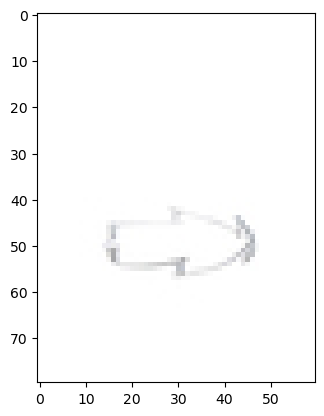

In [136]:
plt.imshow(Image.open(uploaded_img))
print("Subcategory: ",preds['subCategory'])
print("Article type: ",preds['articleType'])
print("Colour: ",preds['baseColour'])
print("Gender: ",preds['gender'])
print("Season: ",preds['season'])
print("Usage: ",preds['usage'])

2202 items after filtering.

Baggit Women Grey & Blue Dhamal Mobile Pouch
→ SubCategory: Bags, Article Type: Mobile Pouch, Colour: Grey
→ Gender: Women, Season: Summer, Usage: Casual


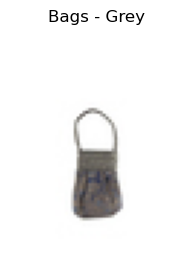


French Connection Women Grey Belt
→ SubCategory: Belts, Article Type: Belts, Colour: Grey
→ Gender: Women, Season: Summer, Usage: Casual


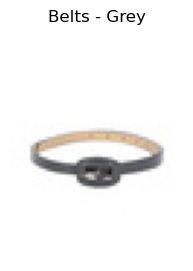


Gini and Jony Girl's Vanida Blue Dungree Kidswear
→ SubCategory: Bottomwear, Article Type: Skirts, Colour: Blue
→ Gender: Women, Season: Summer, Usage: Casual


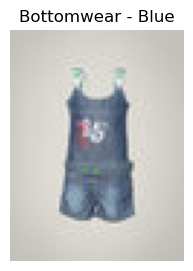


Lotto Women White Flip Flops
→ SubCategory: Flip Flops, Article Type: Flip Flops, Colour: White
→ Gender: Women, Season: Summer, Usage: Casual


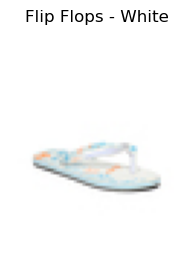


United Colors of Benetton Women Funky Red Bracelet
→ SubCategory: Jewellery, Article Type: Bracelet, Colour: Red
→ Gender: Women, Season: Summer, Usage: Casual


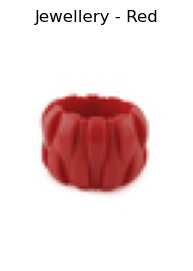

['47369.jpg', '42915.jpg', '4929.jpg', '58326.jpg', '14864.jpg']

In [137]:
recommend_outfit_items_text_features(preds, df_balanced, image_dir='images')

Uploaded image:

{'articleType': 'Necklace and Chains', 'subCategory': 'Jewellery', 'baseColour': 'Turquoise Blue', 'gender': 'Women', 'season': 'Fall', 'usage': 'Casual'}
686 items after filtering.

Puma Women Core Lite Grip White Duffle Bag
→ SubCategory: Bags, Article Type: Duffel Bag, Colour: White
→ Gender: Women, Season: Fall, Usage: Casual


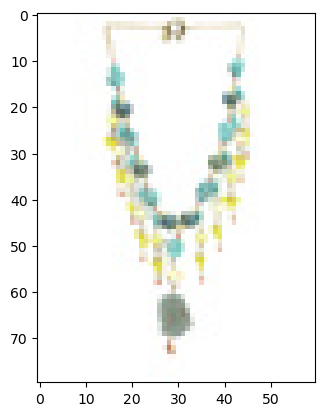

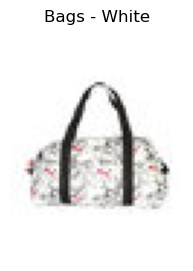


United Colors of Benetton Women Solid Grey Belt
→ SubCategory: Belts, Article Type: Belts, Colour: Grey
→ Gender: Women, Season: Fall, Usage: Casual


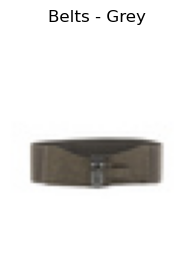


United Colors of Benetton Women Check Skirt Grey Skirts
→ SubCategory: Bottomwear, Article Type: Skirts, Colour: Grey
→ Gender: Women, Season: Fall, Usage: Casual


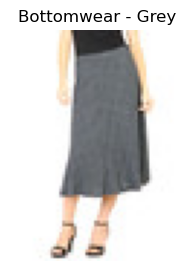


ADIDAS Women Psychedlic White Flip Flops
→ SubCategory: Flip Flops, Article Type: Flip Flops, Colour: White
→ Gender: Women, Season: Fall, Usage: Casual


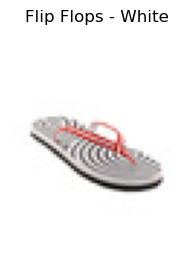


Nike Women Steady VIII White Casual Shoe
→ SubCategory: Shoes, Article Type: Casual Shoes, Colour: White
→ Gender: Women, Season: Fall, Usage: Casual


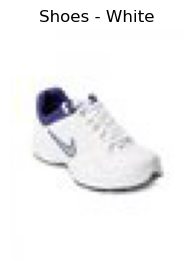

Uploaded image:

{'articleType': 'Sarees', 'subCategory': 'Topwear', 'baseColour': 'Black', 'gender': 'Women', 'season': 'Summer', 'usage': 'Casual'}
2202 items after filtering.

Baggit Women Grey & Blue Dhamal Mobile Pouch
→ SubCategory: Bags, Article Type: Mobile Pouch, Colour: Grey
→ Gender: Women, Season: Summer, Usage: Casual


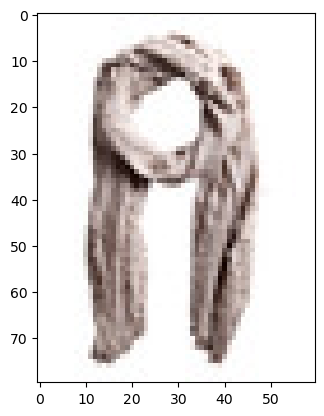

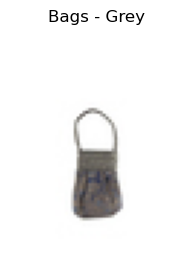


French Connection Women Grey Belt
→ SubCategory: Belts, Article Type: Belts, Colour: Grey
→ Gender: Women, Season: Summer, Usage: Casual


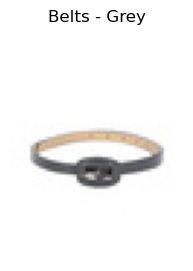


Gini and Jony Girl's Vanida Blue Dungree Kidswear
→ SubCategory: Bottomwear, Article Type: Skirts, Colour: Blue
→ Gender: Women, Season: Summer, Usage: Casual


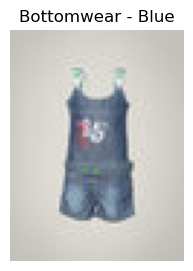


Lotto Women White Flip Flops
→ SubCategory: Flip Flops, Article Type: Flip Flops, Colour: White
→ Gender: Women, Season: Summer, Usage: Casual


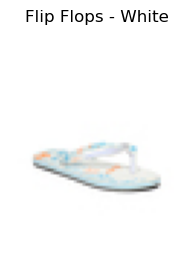


United Colors of Benetton Women Funky Red Bracelet
→ SubCategory: Jewellery, Article Type: Bracelet, Colour: Red
→ Gender: Women, Season: Summer, Usage: Casual


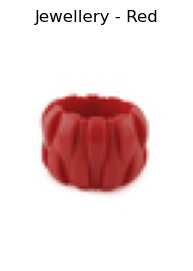

Uploaded image:

{'articleType': 'Shirts', 'subCategory': 'Topwear', 'baseColour': 'Silver', 'gender': 'Women', 'season': 'Summer', 'usage': 'Casual'}
3611 items after filtering.

Baggit Women Grey Doodle Jhuti Mobile Pouch
→ SubCategory: Bags, Article Type: Mobile Pouch, Colour: Grey
→ Gender: Women, Season: Summer, Usage: Casual


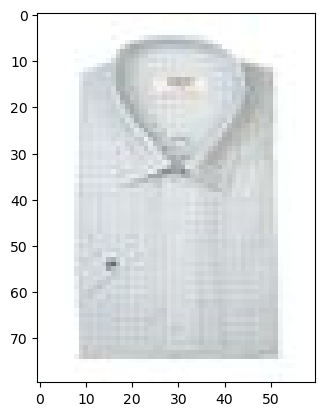

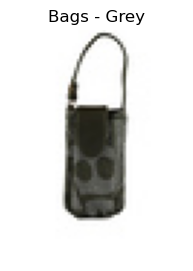


Baggit Women Charmy Judo Grey Belt
→ SubCategory: Belts, Article Type: Belts, Colour: Grey
→ Gender: Women, Season: Summer, Usage: Casual


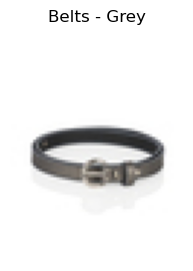


Levis Kids Girl's Betsy Navy Kidswear
→ SubCategory: Bottomwear, Article Type: Skirts, Colour: Navy Blue
→ Gender: Women, Season: Summer, Usage: Casual


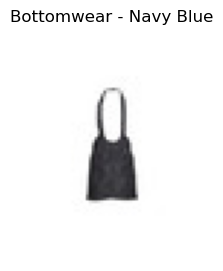


Nike Women Butterfly Thong Black Purple Flip Flops
→ SubCategory: Flip Flops, Article Type: Flip Flops, Colour: Black
→ Gender: Women, Season: Summer, Usage: Casual


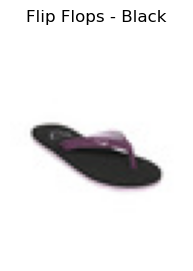


Lucera Women Black & Silver Bracelet
→ SubCategory: Jewellery, Article Type: Bracelet, Colour: Black
→ Gender: Women, Season: Summer, Usage: Casual


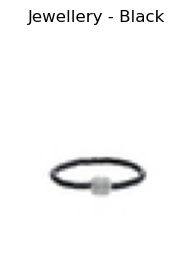

Uploaded image:

{'articleType': 'Shirts', 'subCategory': 'Topwear', 'baseColour': 'Black', 'gender': 'Men', 'season': 'Fall', 'usage': 'Casual'}
687 items after filtering.

Puma Men high shine White Belt
→ SubCategory: Belts, Article Type: Belts, Colour: White
→ Gender: Men, Season: Fall, Usage: Casual


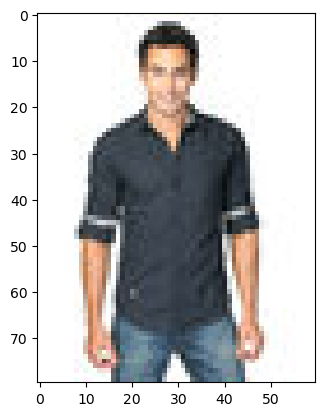

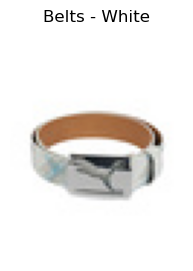


Highlander Men Classic Chinos Beige Trousers
→ SubCategory: Bottomwear, Article Type: Trousers, Colour: Beige
→ Gender: Men, Season: Fall, Usage: Casual


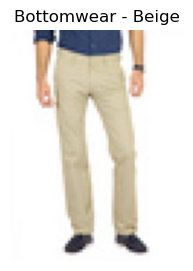


Lotto Men Racing Olive Slippers
→ SubCategory: Flip Flops, Article Type: Flip Flops, Colour: Olive
→ Gender: Men, Season: Fall, Usage: Casual


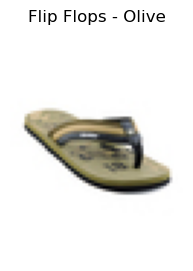


Numero Uno Men White Casual Shoes
→ SubCategory: Shoes, Article Type: Casual Shoes, Colour: White
→ Gender: Men, Season: Fall, Usage: Casual


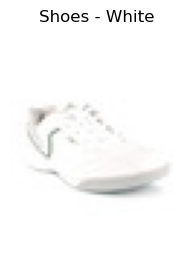


Fila Men Ankel White Socks
→ SubCategory: Socks, Article Type: Socks, Colour: White
→ Gender: Men, Season: Fall, Usage: Casual


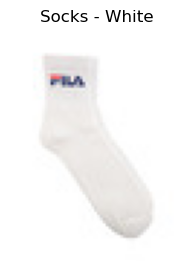

Uploaded image:

{'articleType': 'Belts', 'subCategory': 'Belts', 'baseColour': 'Black', 'gender': 'Men', 'season': 'Fall', 'usage': 'Casual'}
1316 items after filtering.

ADIDAS Men Grey & Red Tracksuit
→ SubCategory: Bottomwear, Article Type: Tracksuits, Colour: Grey
→ Gender: Men, Season: Fall, Usage: Casual


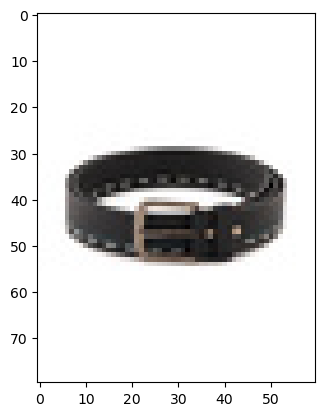

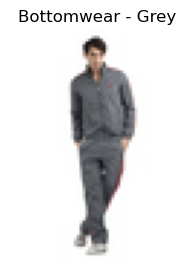


Lotto Men Sign Grey Slippers
→ SubCategory: Flip Flops, Article Type: Flip Flops, Colour: Grey
→ Gender: Men, Season: Fall, Usage: Casual


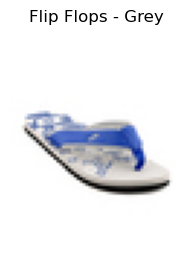


ADIDAS Men White Snipe Lo Casual Shoes
→ SubCategory: Shoes, Article Type: Casual Shoes, Colour: White
→ Gender: Men, Season: Fall, Usage: Casual


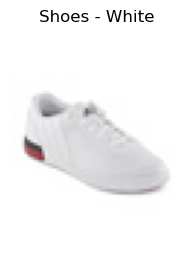


Fila Men Ankel White Socks
→ SubCategory: Socks, Article Type: Socks, Colour: White
→ Gender: Men, Season: Fall, Usage: Casual


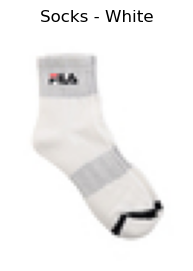


Flying Machine Men Solid Blue Sweaters
→ SubCategory: Topwear, Article Type: Sweaters, Colour: Blue
→ Gender: Men, Season: Fall, Usage: Casual


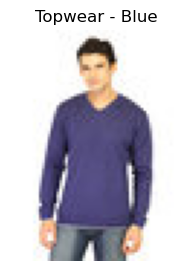

Uploaded image:

{'articleType': 'Casual Shoes', 'subCategory': 'Shoes', 'baseColour': 'Black', 'gender': 'Men', 'season': 'Summer', 'usage': 'Casual'}
1214 items after filtering.

Nike Men Olive Backpack
→ SubCategory: Bags, Article Type: Backpacks, Colour: Olive
→ Gender: Men, Season: Summer, Usage: Casual


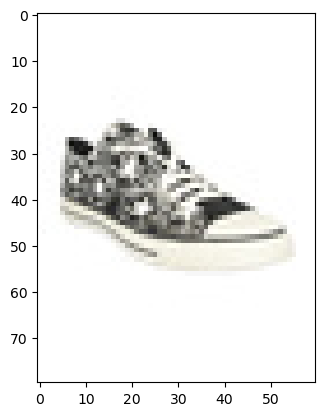

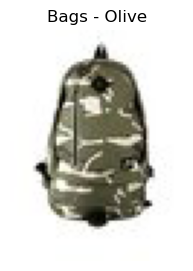


Peter England Men Casual Olive Belt
→ SubCategory: Belts, Article Type: Belts, Colour: Olive
→ Gender: Men, Season: Summer, Usage: Casual


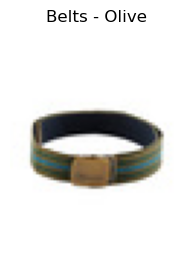


Nike Men Classic Jersey Grey Track Pants
→ SubCategory: Bottomwear, Article Type: Track Pants, Colour: Grey
→ Gender: Men, Season: Summer, Usage: Casual


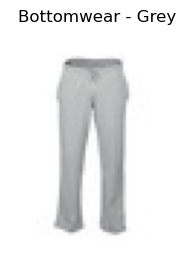


Lotto Men Red Flip Flops
→ SubCategory: Flip Flops, Article Type: Flip Flops, Colour: Red
→ Gender: Men, Season: Summer, Usage: Casual


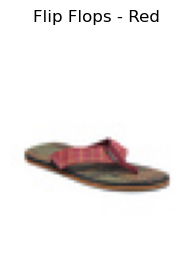


Fabindia Men White Pyjamas
→ SubCategory: Loungewear and Nightwear, Article Type: Lounge Pants, Colour: White
→ Gender: Men, Season: Summer, Usage: Casual


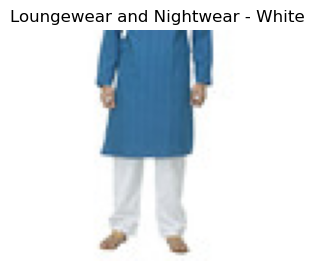

Uploaded image:

{'articleType': 'Kurtas', 'subCategory': 'Topwear', 'baseColour': 'White', 'gender': 'Women', 'season': 'Summer', 'usage': 'Ethnic'}
587 items after filtering.

Fabindia Red Silk Sling Purse
→ SubCategory: Bags, Article Type: Clutches, Colour: Red
→ Gender: Women, Season: Summer, Usage: Ethnic


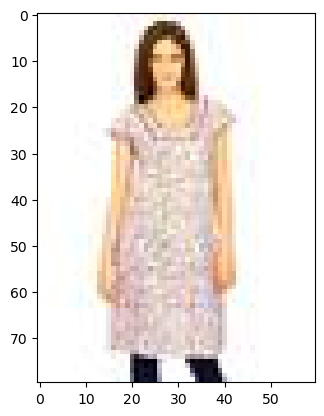

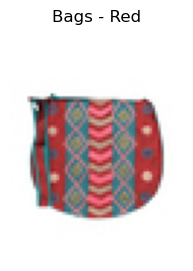


Fabindia Women Red Skirts
→ SubCategory: Bottomwear, Article Type: Skirts, Colour: Red
→ Gender: Women, Season: Summer, Usage: Ethnic


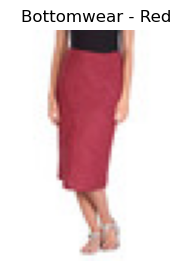


Royal Diadem Red Earrings
→ SubCategory: Jewellery, Article Type: Earrings, Colour: Red
→ Gender: Women, Season: Summer, Usage: Ethnic


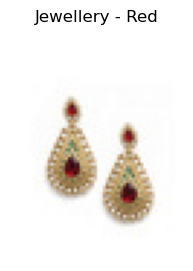


Fabindia Women Blue Salwar
→ SubCategory: Loungewear and Nightwear, Article Type: Lounge Pants, Colour: Blue
→ Gender: Women, Season: Summer, Usage: Ethnic


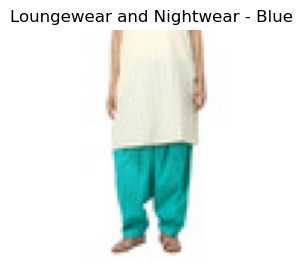


FNF Printed Blue Sari
→ SubCategory: Saree, Article Type: Sarees, Colour: Blue
→ Gender: Women, Season: Summer, Usage: Ethnic


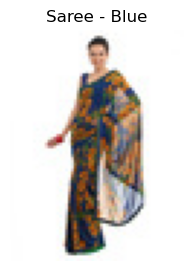

Uploaded image:

{'articleType': 'Bangle', 'subCategory': 'Jewellery', 'baseColour': 'Silver', 'gender': 'Women', 'season': 'Summer', 'usage': 'Casual'}
3608 items after filtering.

Baggit Women Purple Phulrani Brush Mobile Pouch
→ SubCategory: Bags, Article Type: Mobile Pouch, Colour: Purple
→ Gender: Women, Season: Summer, Usage: Casual


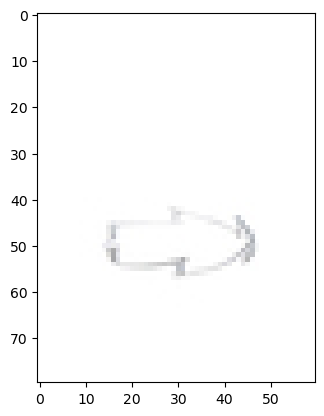

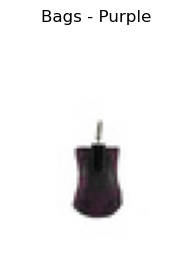


Baggit Women Xylo Hatela Purple Belt
→ SubCategory: Belts, Article Type: Belts, Colour: Purple
→ Gender: Women, Season: Summer, Usage: Casual


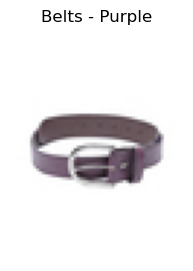


Levis Kids Girl's Betsy Navy Kidswear
→ SubCategory: Bottomwear, Article Type: Skirts, Colour: Navy Blue
→ Gender: Women, Season: Summer, Usage: Casual


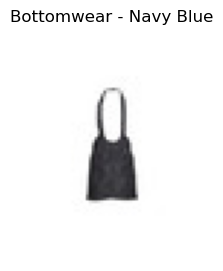


Lotto Women Grey Flip Flop
→ SubCategory: Flip Flops, Article Type: Flip Flops, Colour: Grey
→ Gender: Women, Season: Summer, Usage: Casual


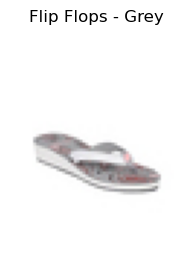


Little Miss Intimates White Printed Pyjama Set
→ SubCategory: Loungewear and Nightwear, Article Type: Night suits, Colour: White
→ Gender: Women, Season: Summer, Usage: Casual


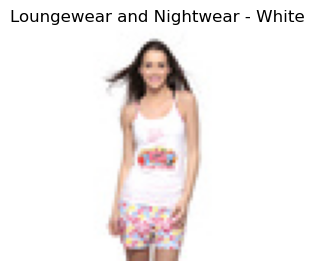

Uploaded image:

{'articleType': 'Shirts', 'subCategory': 'Topwear', 'baseColour': 'Blue', 'gender': 'Men', 'season': 'Summer', 'usage': 'Casual'}
481 items after filtering.

Quiksilver Men White & Black Base Satchel Bag
→ SubCategory: Bags, Article Type: Messenger Bag, Colour: White
→ Gender: Men, Season: Summer, Usage: Casual


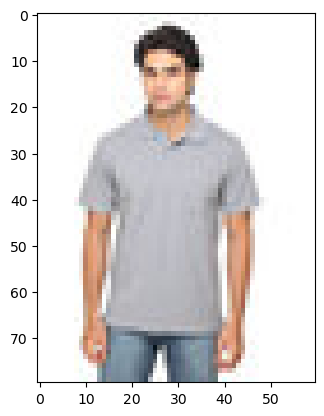

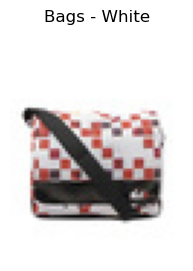


Lee Men Canvas Beige Belt
→ SubCategory: Belts, Article Type: Belts, Colour: Beige
→ Gender: Men, Season: Summer, Usage: Casual


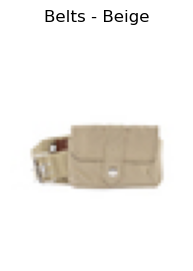


Highlander Men Beige Trousers
→ SubCategory: Bottomwear, Article Type: Trousers, Colour: Beige
→ Gender: Men, Season: Summer, Usage: Casual


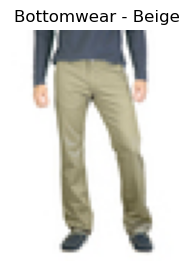


Numero Uno Men Yellow Flip Flops
→ SubCategory: Flip Flops, Article Type: Flip Flops, Colour: Yellow
→ Gender: Men, Season: Summer, Usage: Casual


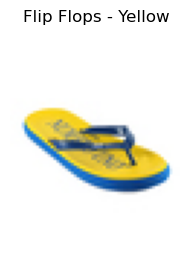


Fabindia Men White Pyjamas
→ SubCategory: Loungewear and Nightwear, Article Type: Lounge Pants, Colour: White
→ Gender: Men, Season: Summer, Usage: Casual


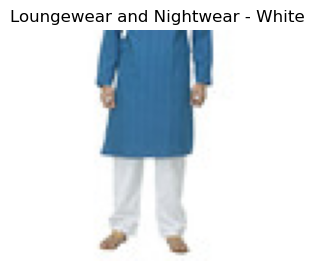

Uploaded image:

{'articleType': 'Tops', 'subCategory': 'Topwear', 'baseColour': 'White', 'gender': 'Women', 'season': 'Summer', 'usage': 'Casual'}
4178 items after filtering.

Baggit Women Grey Doodle Jhuti Mobile Pouch
→ SubCategory: Bags, Article Type: Mobile Pouch, Colour: Grey
→ Gender: Women, Season: Summer, Usage: Casual


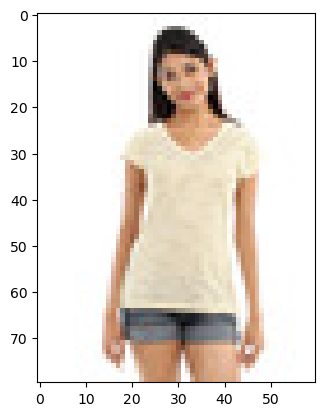

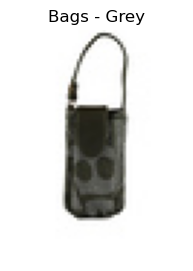


Baggit Women Charmy Judo Grey Belt
→ SubCategory: Belts, Article Type: Belts, Colour: Grey
→ Gender: Women, Season: Summer, Usage: Casual


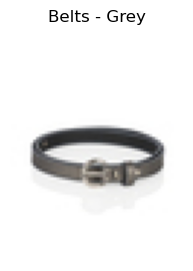


Gini and Jony Girl's Vanida Blue Dungree Kidswear
→ SubCategory: Bottomwear, Article Type: Skirts, Colour: Blue
→ Gender: Women, Season: Summer, Usage: Casual


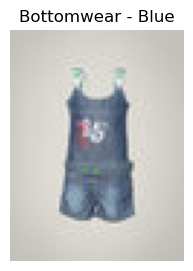


Tiptopp Women Black Flats
→ SubCategory: Flip Flops, Article Type: Flip Flops, Colour: Black
→ Gender: Women, Season: Summer, Usage: Casual


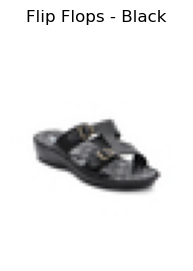


Lucera Women Black & Silver Bracelet
→ SubCategory: Jewellery, Article Type: Bracelet, Colour: Black
→ Gender: Women, Season: Summer, Usage: Casual


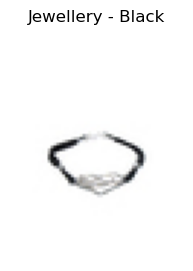

Uploaded image:

{'articleType': 'Tops', 'subCategory': 'Topwear', 'baseColour': 'White', 'gender': 'Women', 'season': 'Summer', 'usage': 'Casual'}
4178 items after filtering.

Baggit Women Grey Doodle Jhuti Mobile Pouch
→ SubCategory: Bags, Article Type: Mobile Pouch, Colour: Grey
→ Gender: Women, Season: Summer, Usage: Casual


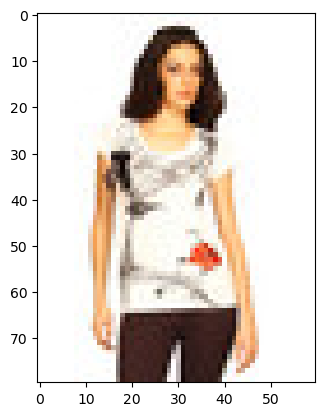

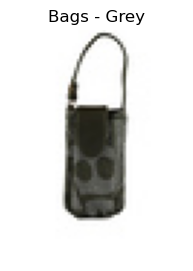


Baggit Women Charmy Judo Grey Belt
→ SubCategory: Belts, Article Type: Belts, Colour: Grey
→ Gender: Women, Season: Summer, Usage: Casual


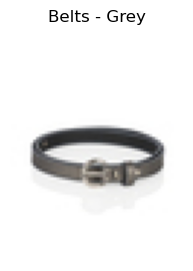


Gini and Jony Girl's Vanida Blue Dungree Kidswear
→ SubCategory: Bottomwear, Article Type: Skirts, Colour: Blue
→ Gender: Women, Season: Summer, Usage: Casual


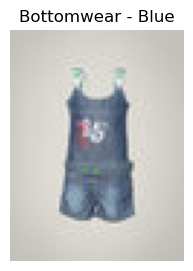


Tiptopp Women Black Flats
→ SubCategory: Flip Flops, Article Type: Flip Flops, Colour: Black
→ Gender: Women, Season: Summer, Usage: Casual


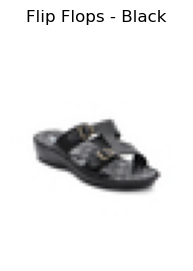


Lucera Women Black & Silver Bracelet
→ SubCategory: Jewellery, Article Type: Bracelet, Colour: Black
→ Gender: Women, Season: Summer, Usage: Casual


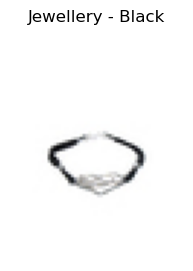

Uploaded image:

{'articleType': 'Jeans', 'subCategory': 'Bottomwear', 'baseColour': 'Navy Blue', 'gender': 'Women', 'season': 'Summer', 'usage': 'Casual'}
1790 items after filtering.

Kiara Women Pink Handbag
→ SubCategory: Bags, Article Type: Handbags, Colour: Pink
→ Gender: Women, Season: Summer, Usage: Casual


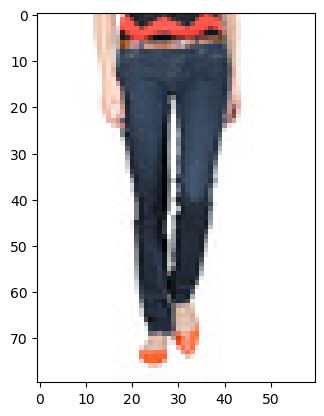

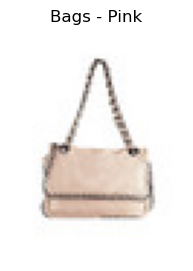


French Connection Women Pink Belt
→ SubCategory: Belts, Article Type: Belts, Colour: Pink
→ Gender: Women, Season: Summer, Usage: Casual


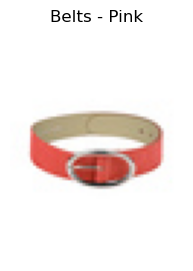


Puma Women Stawberry Pink Flip Flops
→ SubCategory: Flip Flops, Article Type: Flip Flops, Colour: Pink
→ Gender: Women, Season: Summer, Usage: Casual


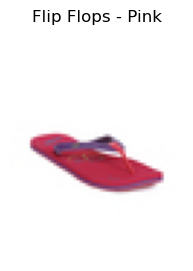


Miki Pearl Women Ivory Jewellery Set
→ SubCategory: Jewellery, Article Type: Jewellery Set, Colour: White
→ Gender: Women, Season: Summer, Usage: Casual


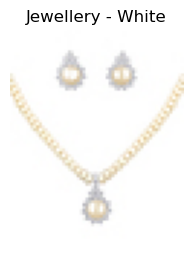


Little Miss Intimates White Printed Pyjama Set
→ SubCategory: Loungewear and Nightwear, Article Type: Night suits, Colour: White
→ Gender: Women, Season: Summer, Usage: Casual


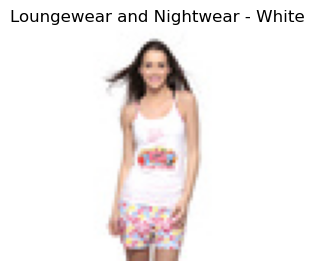

Uploaded image:

{'articleType': 'Earrings', 'subCategory': 'Jewellery', 'baseColour': 'Blue', 'gender': 'Women', 'season': 'Summer', 'usage': 'Casual'}
1873 items after filtering.

Baggit Women Red Affair Hoor Mobile Pouch
→ SubCategory: Bags, Article Type: Mobile Pouch, Colour: Red
→ Gender: Women, Season: Summer, Usage: Casual


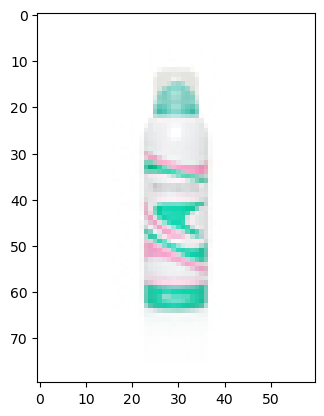

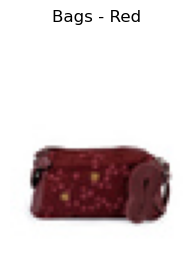


Baggit Women Yellow Baaz Moly Belt
→ SubCategory: Belts, Article Type: Belts, Colour: Yellow
→ Gender: Women, Season: Summer, Usage: Casual


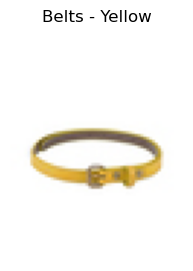


Palm Tree Girls Sp Jace Sko White Skirts
→ SubCategory: Bottomwear, Article Type: Skirts, Colour: White
→ Gender: Women, Season: Summer, Usage: Casual


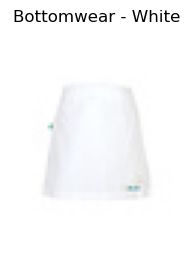


Lotto Women's Juicy Red Flip Flop
→ SubCategory: Flip Flops, Article Type: Flip Flops, Colour: Red
→ Gender: Women, Season: Summer, Usage: Casual


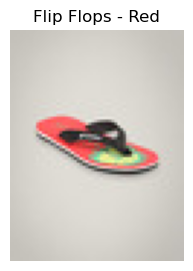


Little Miss Intimates Pink & Black Pyjama Set
→ SubCategory: Loungewear and Nightwear, Article Type: Night suits, Colour: Pink
→ Gender: Women, Season: Summer, Usage: Casual


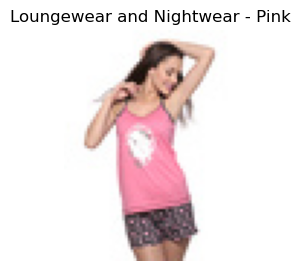

Uploaded image:

{'articleType': 'Tops', 'subCategory': 'Topwear', 'baseColour': 'Black', 'gender': 'Women', 'season': 'Summer', 'usage': 'Casual'}
2202 items after filtering.

Baggit Women Grey & Blue Dhamal Mobile Pouch
→ SubCategory: Bags, Article Type: Mobile Pouch, Colour: Grey
→ Gender: Women, Season: Summer, Usage: Casual


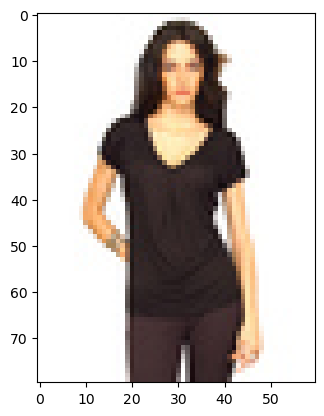

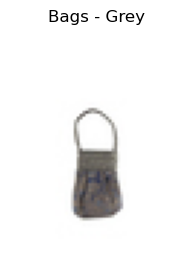


French Connection Women Grey Belt
→ SubCategory: Belts, Article Type: Belts, Colour: Grey
→ Gender: Women, Season: Summer, Usage: Casual


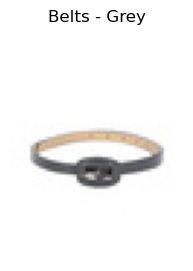


Gini and Jony Girl's Vanida Blue Dungree Kidswear
→ SubCategory: Bottomwear, Article Type: Skirts, Colour: Blue
→ Gender: Women, Season: Summer, Usage: Casual


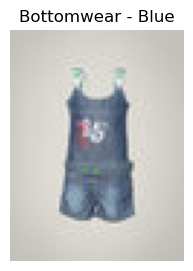


Lotto Women White Flip Flops
→ SubCategory: Flip Flops, Article Type: Flip Flops, Colour: White
→ Gender: Women, Season: Summer, Usage: Casual


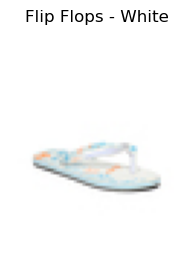


United Colors of Benetton Women Funky Red Bracelet
→ SubCategory: Jewellery, Article Type: Bracelet, Colour: Red
→ Gender: Women, Season: Summer, Usage: Casual


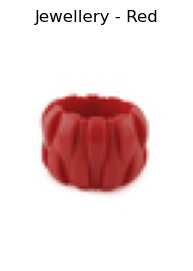

In [138]:
random_product_ids = [54872, 25956, 33250, 8190, 14978, 8249, 11581, 48748, 34232, 44689, 3947, 40371, 46655, 3969]

for i in random_product_ids:
    file = str(i) + '.jpg'
    img_path = os.path.join(image_dir, file)
    print("Uploaded image:\n")
    plt.imshow(Image.open(img_path))
    # Suppose you extracted features from a new uploaded image:
    new_feat = extract_features(img_path).reshape(1, -1)
    preds = {}
    # Predict one by one:
    for target in target_cols:
        pred_class = encoders[target].inverse_transform(
            [models[target].predict(new_feat)[0]]
        )[0]
        preds[target] = pred_class

    print(preds)

    recommend_outfit_items_text_features(preds, df_balanced)
    

In [176]:
import gzip
import shutil

def compress_pickle(input_path, output_path):
    with open(input_path, 'rb') as f_in:
        with gzip.open(output_path, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

# Example usage
compress_pickle('saved_models/gender_model.pkl', 'saved_models/gender_model.pkl.gz')


In [177]:
compress_pickle('saved_models/articleType_model.pkl', 'saved_models/articleType_model.pkl.gz')

In [178]:
compress_pickle('saved_models/baseColour_model.pkl', 'saved_models/baseColour_model.pkl.gz')

In [179]:
compress_pickle('saved_models/season_model.pkl', 'saved_models/season_model.pkl.gz')

In [180]:
compress_pickle('saved_models/subCategory_model.pkl', 'saved_models/subCategory_model.pkl.gz')

In [181]:
compress_pickle('saved_models/usage_model.pkl', 'saved_models/usage_model.pkl.gz')

In [182]:
# compress encoders
compress_pickle('saved_models/subCategory_encoder.pkl', 'saved_models/subCategory_encoder.pkl.gz')

In [183]:
compress_pickle('saved_models/articleType_encoder.pkl', 'saved_models/articleType_encoder.pkl.gz')

In [184]:
compress_pickle('saved_models/gender_encoder.pkl', 'saved_models/gender_encoder.pkl.gz')

In [185]:
compress_pickle('saved_models/season_encoder.pkl', 'saved_models/season_encoder.pkl.gz')

In [186]:
compress_pickle('saved_models/baseColour_encoder.pkl', 'saved_models/baseColour_encoder.pkl.gz')

In [187]:
compress_pickle('saved_models/usage_encoder.pkl', 'saved_models/usage_encoder.pkl.gz')

In [188]:
len(df_balanced.filename.unique())

8581

In [1]:
from sklearn.metrics.pairwise import cosine_similarity
import os
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

def recommend_outfit_items_text_features(pred_labels, df, image_dir='images', top_k=5):
    subcat      = pred_labels['subCategory']
    article     = pred_labels['articleType']
    base_colour = pred_labels['baseColour']
    gender      = pred_labels['gender']
    season      = pred_labels['season']
    usage       = pred_labels['usage']

    # Matching gender and season logic
    valid_genders = get_matching_gender(gender)
    valid_seasons = get_matching_season(season)
    valid_colours = get_complementary_base_colours(base_colour)

    # Filter based on rules
    filtered_df = df[
        (df['subCategory'] != subcat) &
        (df['gender'].isin(valid_genders)) &
        (df['season'].isin(valid_seasons)) &
        (df['baseColour'].isin(valid_colours)) &
        (df['usage'] == usage)
    ].copy()

    if filtered_df.empty:
        # print("No complementary items found.")
        return

    # print(f"{len(filtered_df)} items after filtering.")

    # One-hot encode catalogue and input
    input_row = pd.DataFrame([{
        'baseColour': base_colour,
        'gender'    : gender,
        'season'    : season,
        'usage'     : usage
    }])

    X_input = encoder.transform(input_row[similarity_cols]).toarray()
    X_cat   = encoder.transform(filtered_df[similarity_cols]).toarray()

    # Compute cosine similarity
    sims = cosine_similarity(X_input, X_cat)[0]
    filtered_df['similarity'] = sims

    # Only keep valid complementary subcategories
    if article in ["Shoes", "Flip Flops"]:
        valid_articles = complementary_map.get(article)
        filtered_df = filtered_df[filtered_df['articleType'].isin(valid_articles)]

    if filtered_df.empty:
        print("No matching subcategories found.")
        return

    # Get top 1 per subcategory
    top_items = (
        filtered_df
        .sort_values('similarity', ascending=False)
        .groupby('subCategory', as_index=False)
        .first()
        .sort_values('similarity', ascending=False)
        .head(top_k)
    )

    # Show results
    recommendations = []
    for _, row in top_items.iterrows():
        recommendations.append(row['filename'])
        # print(f"\n{row['productDisplayName']}")
        # print(f"→ SubCategory: {row['subCategory']}, Article Type: {row['articleType']}, Colour: {row['baseColour']}")
        # print(f"→ Gender: {row['gender']}, Season: {row['season']}, Usage: {row['usage']}")
        # img_path = os.path.join(image_dir, row['filename'])
        # if os.path.exists(img_path):
        #     plt.figure(figsize=(3,3))
        #     plt.imshow(Image.open(img_path))
        #     plt.axis('off')
        #     plt.title(f"{row['subCategory']} - {row['baseColour']}")
        #     plt.show()
    
    return recommendations


In [ ]:
test_samples = df_balanced.filename.unique()[:10000]
recommended_items = []

for i in tqdm.tqdm(test_samples):
    img_path = os.path.join(image_dir, i)
    
    new_feat = extract_features(img_path).reshape(1, -1)
    preds = {}

    for target in target_cols:
        pred_class = encoders[target].inverse_transform(
            [models[target].predict(new_feat)[0]]
        )[0]
        preds[target] = pred_class

    recommendations = recommend_outfit_items_text_features(preds, df_balanced)
    if recommendations is not None:
        for rec in recommendations:
            recommended_items.append(rec)

In [204]:
len(recommended_items)

40994

In [205]:
def calculate_coverage(recommendations, all_items):
    unique_recs = set(recommendations)
    cov = len(unique_recs) / len(all_items)
    return cov


In [206]:
all_items = list(df_balanced.filename.unique())

In [207]:
len(set(recommended_items))

1255

In [208]:
len(all_items)

8581

In [209]:
calculate_coverage(recommended_items, all_items)

0.14625335042535834